In [132]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from six.moves import urllib
from zipfile import ZipFile
import math
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import ttest_ind

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Étape  1: Import et rassemblement des données dans un tableau

In [133]:
DOWNLOAD_ROOT = "https://github.com/Teerath67/Projet-IA/raw/master/data.zip"
DATA_PATH = os.path.join("datasets", "data")

MANAGER_SURVEY_CSV = "manager_survey_data.csv"
EMPLOYEE_SURVEY_CSV = "employee_survey_data.csv"
GENERAL_CSV = "general_data.csv"
IN_TIME_CSV = "in_time.csv"
OUT_TIME_CSV = "out_time.csv"

def fetch_data(download_url=DOWNLOAD_ROOT, data_path=DATA_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, "data.zip")
    urllib.request.urlretrieve(download_url, zip_path)
    data_zip = ZipFile(zip_path, 'r')
    data_zip.extractall(path=data_path)
    data_zip.close()

def load_data(general_path, csv):
    csv_path = os.path.join(general_path, csv)
    df = pd.read_csv(csv_path, sep=",", header = 0)
    return df

fetch_data()

In [134]:
general = load_data(DATA_PATH, GENERAL_CSV)
in_time = load_data(DATA_PATH, IN_TIME_CSV)
out_time = load_data(DATA_PATH, OUT_TIME_CSV)
manager_survey = load_data(DATA_PATH, MANAGER_SURVEY_CSV)
employee_survey = load_data(DATA_PATH, EMPLOYEE_SURVEY_CSV)

## Check des données
On va regarder les première colonnes des différents dataframe ainsi que le type des données qu'ils contiennent.

In [135]:
general.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

In [136]:
in_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29  ...   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26  ...   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22  ...   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 09:55:29  2015-12-22 10:04:06   
1  2015-12-18 10:37:17  2015-12-21 09:49:02  2015-12-22 10:33:51   
2  2015-12-18 10:15:14  2015-12-21 10:10:28  2015-12-22 09:44:44   
3  2015-12-18 10:17:38  2015-12-21 09:58:21  2015-12-22 10:04:25   
4  2015-12-18 09:58:35  2015-12-21 10:03:41  2015-12-22 10:10:30   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 10:14:27  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41   
1  2015-12-23 10:12:10                  NaN        NaN  2015-12-28 09:31:45   
2  2015-12-23 10:15:54  2015-12-24 10:07:26        NaN  2015-12-28 09:42:05   
3  2015-12-23 10:11:46  2015-12-24 09:43:15        NaN  2015-12-28 09:52:44   
4  2015-12-23 10:13:36  2015-12-24 09:44:24        NaN  2015-12-28 10:05:15   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 10:03:36  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-29 09:55:49  2015-12-30 10:32:25  2015-12-31 09:27:20  
2  2015-12-29 09:43:36  2015-12-30 09:34:05  2015-12-31 10:28:39  
3  2015-12-29 09:33:16  2015-12-30 10:18:12  2015-12-31 10:01:15  
4  2015-12-29 10:30:53  2015-12-30 09:18:21  2015-12-31 09:41:09  

[5 rows x 262 columns]

In [137]:
out_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13  ...   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25  ...   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45  ...   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
1  2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
2  2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
3  2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
4  2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 16:44:44  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
1  2015-12-23 17:38:18                  NaN        NaN  2015-12-28 17:08:38   
2  2015-12-23 16:59:43  2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
3  2015-12-23 17:36:35  2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
4  2015-12-23 18:00:49  2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
2  2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
3  2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
4  2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 262 columns]

In [138]:
manager_survey.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [139]:
employee_survey.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [140]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [141]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [142]:
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [143]:
manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [144]:
employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


## Clean et transformation des données de temps
On va transfomer tous les objets contenus dans les tableaux in_time et out_time en datetime afin de pouvoir les utiliser pour des opérations

In [145]:
in_time.iloc[:,1:]= in_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')

In [146]:
out_time.iloc[:,1:]= out_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')

In [147]:
in_time.head()

Unnamed: 0 2015-01-01          2015-01-02          2015-01-05  \
0           1        NaT 2015-01-02 09:43:45 2015-01-05 10:08:48   
1           2        NaT 2015-01-02 10:15:44 2015-01-05 10:21:05   
2           3        NaT 2015-01-02 10:17:41 2015-01-05 09:50:50   
3           4        NaT 2015-01-02 10:05:06 2015-01-05 09:56:32   
4           5        NaT 2015-01-02 10:28:17 2015-01-05 09:49:58   

           2015-01-06          2015-01-07          2015-01-08  \
0 2015-01-06 09:54:26 2015-01-07 09:34:31 2015-01-08 09:51:09   
1                 NaT 2015-01-07 09:45:17 2015-01-08 10:09:04   
2 2015-01-06 10:14:13 2015-01-07 09:47:27 2015-01-08 10:03:40   
3 2015-01-06 10:11:07 2015-01-07 09:37:30 2015-01-08 10:02:08   
4 2015-01-06 09:45:28 2015-01-07 09:49:37 2015-01-08 10:19:44   

           2015-01-09          2015-01-12          2015-01-13  ...  \
0 2015-01-09 10:09:25 2015-01-12 09:42:53 2015-01-13 10:13:06  ...   
1 2015-01-09 09:43:26 2015-01-12 10:00:07 2015-01-13 10:43:29  ...   
2 2015-01-09 10:05:49 2015-01-12 10:03:47 2015-01-13 10:21:26  ...   
3 2015-01-09 10:08:12 2015-01-12 10:13:42 2015-01-13 09:53:22  ...   
4 2015-01-09 10:00:50 2015-01-12 10:29:27 2015-01-13 09:59:32  ...   

           2015-12-18          2015-12-21          2015-12-22  \
0                 NaT 2015-12-21 09:55:29 2015-12-22 10:04:06   
1 2015-12-18 10:37:17 2015-12-21 09:49:02 2015-12-22 10:33:51   
2 2015-12-18 10:15:14 2015-12-21 10:10:28 2015-12-22 09:44:44   
3 2015-12-18 10:17:38 2015-12-21 09:58:21 2015-12-22 10:04:25   
4 2015-12-18 09:58:35 2015-12-21 10:03:41 2015-12-22 10:10:30   

           2015-12-23          2015-12-24 2015-12-25          2015-12-28  \
0 2015-12-23 10:14:27 2015-12-24 10:11:35        NaT 2015-12-28 10:13:41   
1 2015-12-23 10:12:10                 NaT        NaT 2015-12-28 09:31:45   
2 2015-12-23 10:15:54 2015-12-24 10:07:26        NaT 2015-12-28 09:42:05   
3 2015-12-23 10:11:46 2015-12-24 09:43:15        NaT 2015-12-28 09:52:44   
4 2015-12-23 10:13:36 2015-12-24 09:44:24        NaT 2015-12-28 10:05:15   

           2015-12-29          2015-12-30          2015-12-31  
0 2015-12-29 10:03:36 2015-12-30 09:54:12 2015-12-31 10:12:44  
1 2015-12-29 09:55:49 2015-12-30 10:32:25 2015-12-31 09:27:20  
2 2015-12-29 09:43:36 2015-12-30 09:34:05 2015-12-31 10:28:39  
3 2015-12-29 09:33:16 2015-12-30 10:18:12 2015-12-31 10:01:15  
4 2015-12-29 10:30:53 2015-12-30 09:18:21 2015-12-31 09:41:09  

[5 rows x 262 columns]

In [148]:
out_time.head()

Unnamed: 0 2015-01-01          2015-01-02          2015-01-05  \
0           1        NaT 2015-01-02 16:56:15 2015-01-05 17:20:11   
1           2        NaT 2015-01-02 18:22:17 2015-01-05 17:48:22   
2           3        NaT 2015-01-02 16:59:14 2015-01-05 17:06:46   
3           4        NaT 2015-01-02 17:25:24 2015-01-05 17:14:03   
4           5        NaT 2015-01-02 18:31:37 2015-01-05 17:49:15   

           2015-01-06          2015-01-07          2015-01-08  \
0 2015-01-06 17:19:05 2015-01-07 16:34:55 2015-01-08 17:08:32   
1                 NaT 2015-01-07 17:09:06 2015-01-08 17:34:04   
2 2015-01-06 16:38:32 2015-01-07 16:33:21 2015-01-08 17:24:22   
3 2015-01-06 17:07:42 2015-01-07 16:32:40 2015-01-08 16:53:11   
4 2015-01-06 17:26:25 2015-01-07 17:37:59 2015-01-08 17:59:28   

           2015-01-09          2015-01-12          2015-01-13  ...  \
0 2015-01-09 17:38:29 2015-01-12 16:58:39 2015-01-13 18:02:58  ...   
1 2015-01-09 16:52:29 2015-01-12 17:36:48 2015-01-13 18:00:13  ...   
2 2015-01-09 16:57:30 2015-01-12 17:28:54 2015-01-13 17:21:25  ...   
3 2015-01-09 17:19:47 2015-01-12 17:13:37 2015-01-13 17:11:45  ...   
4 2015-01-09 17:44:08 2015-01-12 18:51:21 2015-01-13 18:14:58  ...   

           2015-12-18          2015-12-21          2015-12-22  \
0                 NaT 2015-12-21 17:15:50 2015-12-22 17:27:51   
1 2015-12-18 18:31:28 2015-12-21 17:34:16 2015-12-22 18:16:35   
2 2015-12-18 17:02:23 2015-12-21 17:20:17 2015-12-22 16:32:50   
3 2015-12-18 17:55:23 2015-12-21 16:49:09 2015-12-22 17:24:00   
4 2015-12-18 17:52:48 2015-12-21 17:43:35 2015-12-22 18:07:57   

           2015-12-23          2015-12-24 2015-12-25          2015-12-28  \
0 2015-12-23 16:44:44 2015-12-24 17:47:22        NaT 2015-12-28 18:00:07   
1 2015-12-23 17:38:18                 NaT        NaT 2015-12-28 17:08:38   
2 2015-12-23 16:59:43 2015-12-24 16:58:25        NaT 2015-12-28 16:43:31   
3 2015-12-23 17:36:35 2015-12-24 16:48:21        NaT 2015-12-28 17:19:34   
4 2015-12-23 18:00:49 2015-12-24 17:59:22        NaT 2015-12-28 17:44:59   

           2015-12-29          2015-12-30          2015-12-31  
0 2015-12-29 17:22:30 2015-12-30 17:40:56 2015-12-31 17:17:33  
1 2015-12-29 17:54:46 2015-12-30 18:31:35 2015-12-31 17:40:58  
2 2015-12-29 17:09:56 2015-12-30 17:06:25 2015-12-31 17:15:50  
3 2015-12-29 16:58:16 2015-12-30 17:40:11 2015-12-31 17:09:14  
4 2015-12-29 18:47:00 2015-12-30 17:15:33 2015-12-31 17:42:14  

[5 rows x 262 columns]

In [149]:
def to_hour_td(td):
    return td.transform(lambda x: x.seconds/3600)

processed_df = out_time - in_time
mean_presence_time_df = processed_df.iloc[:, 1:].apply(to_hour_td)

In [150]:
mean_presence_time_df.head()

2015-01-01  2015-01-02  2015-01-05  2015-01-06  2015-01-07  2015-01-08  \
0         NaN    7.208333    7.189722    7.410833    7.006667    7.289722   
1         NaN    8.109167    7.454722         NaN    7.396944    7.416667   
2         NaN    6.692500    7.265556    6.405278    6.765000    7.345000   
3         NaN    7.338333    7.291944    6.943056    6.919444    6.850833   
4         NaN    8.055556    7.988056    7.682500    7.806111    7.662222   

   2015-01-09  2015-01-12  2015-01-13  2015-01-14  ...  2015-12-18  \
0    7.484444    7.262778    7.831111         NaN  ...         NaN   
1    7.150833    7.611389    7.278889         NaN  ...    7.903056   
2    6.861389    7.418611    6.999722         NaN  ...    6.785833   
3    7.193056    6.998611    7.306389         NaN  ...    7.629167   
4    7.721667    8.365000    8.257222         NaN  ...    7.903611   

   2015-12-21  2015-12-22  2015-12-23  2015-12-24  2015-12-25  2015-12-28  \
0    7.339167    7.395833    6.504722    7.596389         NaN    7.773889   
1    7.753889    7.712222    7.435556         NaN         NaN    7.614722   
2    7.163611    6.801667    6.730278    6.849722         NaN    7.023889   
3    6.846667    7.326389    7.413611    7.085000         NaN    7.447222   
4    7.665000    7.957500    7.786944    8.249444         NaN    7.662222   

   2015-12-29  2015-12-30  2015-12-31  
0    7.315000    7.778889    7.080278  
1    7.982500    7.986111    8.227222  
2    7.438889    7.538889    6.786389  
3    7.416667    7.366389    7.133056  
4    8.268611    7.953333    8.018056  

[5 rows x 261 columns]

In [151]:
final_time_df = pd.DataFrame()
final_time_df["meanPresenceTime"] = mean_presence_time_df.mean(axis=1)
final_time_df["EmployeeID"] = out_time["Unnamed: 0"]

In [152]:
final_time_df.head()

meanPresenceTime  EmployeeID
0          7.373651           1
1          7.718969           2
2          7.013240           3
3          7.193678           4
4          8.006175           5

In [153]:
def to_hour(td):
    return td.dt.hour + (td.dt.minute)/60

processed_in_time_df = in_time.iloc[:, 1:].apply(to_hour)
processed_out_time_df = out_time.iloc[:, 1:].apply(to_hour)

mean_starting_time_df = pd.DataFrame()
mean_ending_time_df = pd.DataFrame()
mean_starting_time_df["meanStartingTime"] = processed_in_time_df.mean(axis=1)
mean_ending_time_df["meanEndingTime"] = processed_out_time_df.mean(axis=1)

mean_starting_time_df["EmployeeID"] = out_time["Unnamed: 0"]
mean_ending_time_df["EmployeeID"] = out_time["Unnamed: 0"]

In [154]:
mean_starting_time_df.head()

meanStartingTime  EmployeeID
0          9.993032           1
1          9.980720           2
2         10.016598           3
3          9.973830           4
4          9.990068           5

In [155]:
mean_ending_time_df.head()

meanEndingTime  EmployeeID
0       17.367170           1
1       17.698446           2
2       17.030096           3
3       17.167305           4
4       17.996327           5

In [156]:
sum_absence_day_df = pd.DataFrame()
sum_absence_day_df["EmployeeID"] = in_time["Unnamed: 0"]
sum_absence_day_df["DayOfAbsence"] = in_time.isnull().sum(axis=1)

count_present_day_df = pd.DataFrame()
count_present_day_df["EmployeeID"] = in_time["Unnamed: 0"]
count_present_day_df["DayOfPresence"] = in_time.count(axis=1)

In [157]:
sum_absence_day_df.head()

EmployeeID  DayOfAbsence
0           1            29
1           2            25
2           3            19
3           4            26
4           5            16

In [158]:
count_present_day_df.head()

EmployeeID  DayOfPresence
0           1            233
1           2            237
2           3            243
3           4            236
4           5            246

## Merge des données dans un seul Dataframe

In [159]:
general = general.merge(final_time_df, how='left', on='EmployeeID')
general = general.merge(manager_survey, how='left', on='EmployeeID')
general = general.merge(employee_survey, how='left', on='EmployeeID')
general = general.merge(mean_starting_time_df, how='left', on='EmployeeID')
general = general.merge(mean_ending_time_df, how='left', on='EmployeeID')
general = general.merge(sum_absence_day_df, how='left', on='EmployeeID')
general = general.merge(count_present_day_df, how='left', on='EmployeeID')

general.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   meanPresenceTime JobInvolvement PerformanceRating  EnvironmentSatisfaction  \
0          7.373651              3                 3                      3.0   
1          7.718969              2                 4                      3.0   
2          7.013240              3                 3                      2.0   
3          7.193678              2                 3                      4.0   
4          8.006175              3                 3                      4.0   

   JobSatisfaction WorkLifeBalance  meanStartingTime  meanEndingTime  \
0              4.0             2.0          9.993032       17.367170   
1              2.0             4.0          9.980720       17.698446   
2              2.0             1.0         10.016598       17.030096   
3              4.0             3.0          9.973830       17.167305   
4              1.0             3.0          9.990068       17.996327   

   DayOfAbsence  DayOfPresence  
0            29            233  
1            25            237  
2            19            243  
3            26            236  
4            16            246  

[5 rows x 34 columns]

In [160]:
anlysis_df = general.copy()

# Étape 2 : Analyse des données (EDA)
On va analyser les différentes données pour savoir si on peut remarquer qu'une feature influe beaucoup sur la décision d'un employée de partir de l'entreprise

In [161]:
anlysis_df.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  ...  meanPresenceTime  JobInvolvement  \
count         4410.0  ...       4410.000000     4410.000000   
mean             8.0  ...          7.700792        2.729932   
std              0.0  ...          1.340218        0.711400   
min              8.0  ...          5.950504        1.000000   
25%              8.0  ...          6.673333        2.000000   
50%              8.0  ...          7.406761        3.000000   
75%              8.0  ...          8.368703        3.000000   
max              8.0  ...         11.030960        4.000000   

       PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
count        4410.000000              4385.000000      4390.000000   
mean            3.153741                 2.723603         2.728246   
std             0.360742                 1.092756         1.101253   
min             3.000000                 1.000000         1.000000   
25%             3.000000                 2.000000         2.000000   
50%             3.000000                 3.000000         3.000000   
75%             3.000000                 4.000000         4.000000   
max             4.000000                 4.000000         4.000000   

       WorkLifeBalance  meanStartingTime  meanEndingTime  DayOfAbsence  \
count      4372.000000       4410.000000     4410.000000   4410.000000   
mean          2.761436          9.991773       17.692558     24.734694   
std           0.706245          0.018147        1.340417      5.503779   
min           1.000000          9.929079       15.942330     13.000000   
25%           2.000000          9.979616       16.656231     20.000000   
50%           3.000000          9.991957       17.400237     25.000000   
75%           3.000000         10.003581       18.352469     29.000000   
max           4.000000         10.069684       21.058616     36.000000   

       DayOfPresence  
count    4410.000000  
mean      237.265306  
std         5.503779  
min       226.000000  
25%       233.000000  
50%       237.000000  
75%       242.000000  
max       249.000000  

[8 rows x 26 columns]

In [162]:
anlysis_df['JobLevel'] = anlysis_df['JobLevel'].astype('object')

In [163]:
anlysis_df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

  meanPresenceTime JobInvolvement PerformanceRating  EnvironmentSatisfaction  \
0         7.373651              3                 3                      3.0   
1         7.718969              2                 4                      3.0   
2         7.013240              3                 3                      2.0   
3         7.193678              2                 3                      4.0   
4         8.006175              3                 3                      4.0   

   JobSatisfaction WorkLifeBalance  meanStartingTime  meanEndingTime  \
0              4.0             2.0          9.993032       17.367170   
1              2.0             4.0          9.980720       17.698446   
2              2.0             1.0         10.016598       17.030096   
3              4.0             3.0          9.973830       17.167305   
4              1.0             3.0          9.990068       17.996327   

   DayOfAbsence  DayOfPresence  
0            29            233  
1            25            237  
2            19            243  
3            26            236  
4            16            246  

[5 rows x 34 columns]

On va modifier les données suivantes pour avoir des données plus parlantes afin de faciliter l'analyse :
- Education -> 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'
- EnvironmentSatisfaction -> 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'
- JobInvolvement -> 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'
- JobSatisfaction -> : 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'
- PerformanceRating -> 1 : 'Low', 2: 'Good',3: 'Excellent',4: 'Outstanding'
- WorkLifeBalance -> 1 : 'Bad', 2: 'Good',3: 'Better',4: 'Best'

In [164]:
anlysis_df['Education'] = anlysis_df['Education'].replace({ 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'})
anlysis_df['EnvironmentSatisfaction'] = anlysis_df['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
anlysis_df['JobInvolvement'] = anlysis_df['JobInvolvement'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
anlysis_df['JobSatisfaction'] = general['JobSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
anlysis_df['PerformanceRating'] = anlysis_df['PerformanceRating'].replace({ 1 : 'Low', 2: 'Good',3: 'Excellent',4: 'Outstanding'})
anlysis_df['WorkLifeBalance'] = anlysis_df['WorkLifeBalance'].replace({ 1 : 'Bad', 2: 'Good',3: 'Better',4: 'Best'})

In [165]:
anlysis_df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0        College  Life Sciences              1           1  Female  ...   
1  Below College  Life Sciences              1           2  Female  ...   
2         Master          Other              1           3    Male  ...   
3         Doctor  Life Sciences              1           4    Male  ...   
4  Below College        Medical              1           5    Male  ...   

  meanPresenceTime JobInvolvement PerformanceRating  EnvironmentSatisfaction  \
0         7.373651           High         Excellent                     High   
1         7.718969         Medium       Outstanding                     High   
2         7.013240           High         Excellent                   Medium   
3         7.193678         Medium         Excellent                Very High   
4         8.006175           High         Excellent                Very High   

   JobSatisfaction WorkLifeBalance  meanStartingTime  meanEndingTime  \
0        Very High            Good          9.993032       17.367170   
1           Medium            Best          9.980720       17.698446   
2           Medium             Bad         10.016598       17.030096   
3        Very High          Better          9.973830       17.167305   
4              Low          Better          9.990068       17.996327   

   DayOfAbsence  DayOfPresence  
0            29            233  
1            25            237  
2            19            243  
3            26            236  
4            16            246  

[5 rows x 34 columns]

On remarque que les features EmployeeCount, Over18 et StandardHours ne semblent pas changer, on va voir si elles sont toutes les mêmes dans le dataset :

In [166]:
anlysis_df['EmployeeCount'].value_counts()

1    4410
Name: EmployeeCount, dtype: int64

In [167]:
anlysis_df['Over18'].value_counts()

Y    4410
Name: Over18, dtype: int64

In [168]:
anlysis_df["StandardHours"].value_counts()

8    4410
Name: StandardHours, dtype: int64

Elles sont toutes les mêmes on peut donc les drop pour faciliter l'analyse

In [169]:
anlysis_df.drop(['EmployeeID', 'EmployeeCount','StandardHours','Over18'], axis = 1,inplace=True)

In [170]:
anlysis_df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  Gender JobLevel                    JobRole  \
0        College  Life Sciences  Female        1  Healthcare Representative   
1  Below College  Life Sciences  Female        1         Research Scientist   
2         Master          Other    Male        4            Sales Executive   
3         Doctor  Life Sciences    Male        3            Human Resources   
4  Below College        Medical    Male        1            Sales Executive   

   ... meanPresenceTime  JobInvolvement  PerformanceRating  \
0  ...         7.373651            High          Excellent   
1  ...         7.718969          Medium        Outstanding   
2  ...         7.013240            High          Excellent   
3  ...         7.193678          Medium          Excellent   
4  ...         8.006175            High          Excellent   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0                     High        Very High             Good   
1                     High           Medium             Best   
2                   Medium           Medium              Bad   
3                Very High        Very High           Better   
4                Very High              Low           Better   

   meanStartingTime  meanEndingTime  DayOfAbsence  DayOfPresence  
0          9.993032       17.367170            29            233  
1          9.980720       17.698446            25            237  
2         10.016598       17.030096            19            243  
3          9.973830       17.167305            26            236  
4          9.990068       17.996327            16            246  

[5 rows x 30 columns]

In [171]:
anlysis_df.shape

(4410, 30)

On regarde le type de données contenu dans le nouveau dataframe :

In [172]:
anlysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   object 
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   object 
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [173]:
anlysis_df.describe()

Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
count  4410.000000       4410.000000    4410.000000         4391.000000   
mean     36.923810          9.192517   65029.312925            2.694830   
std       9.133301          8.105026   47068.888559            2.498887   
min      18.000000          1.000000   10090.000000            0.000000   
25%      30.000000          2.000000   29110.000000            1.000000   
50%      36.000000          7.000000   49190.000000            2.000000   
75%      43.000000         14.000000   83800.000000            4.000000   
max      60.000000         29.000000  199990.000000            9.000000   

       PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
count        4410.000000       4410.000000        4401.000000   
mean           15.209524          0.793878          11.279936   
std             3.659108          0.851883           7.782222   
min            11.000000          0.000000           0.000000   
25%            12.000000          0.000000           6.000000   
50%            14.000000          1.000000          10.000000   
75%            18.000000          1.000000          15.000000   
max            25.000000          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  meanPresenceTime  meanStartingTime  \
count           4410.000000       4410.000000       4410.000000   
mean               4.123129          7.700792          9.991773   
std                3.567327          1.340218          0.018147   
min                0.000000          5.950504          9.929079   
25%                2.000000          6.673333          9.979616   
50%                3.000000          7.406761          9.991957   
75%                7.000000          8.368703         10.003581   
max               17.000000         11.030960         10.069684   

       meanEndingTime  DayOfAbsence  DayOfPresence  
count     4410.000000   4410.000000    4410.000000  
mean        17.692558     24.734694     237.265306  
std          1.340417      5.503779       5.503779  
min         15.942330     13.000000     226.000000  
25%         16.656231     20.000000     233.000000  
50%         17.400237     25.000000     237.000000  
75%         18.352469     29.000000     242.000000  
max         21.058616     36.000000     249.000000

<AxesSubplot:ylabel='None'>

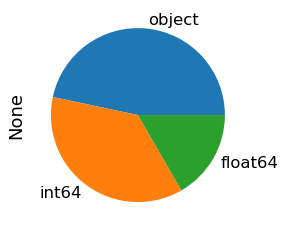

In [174]:
anlysis_df.dtypes.value_counts().plot.pie()

## Identification des valeurs manquantes :
On affiche à l'aide d'une heatmap les valeurs NA:

<AxesSubplot:>

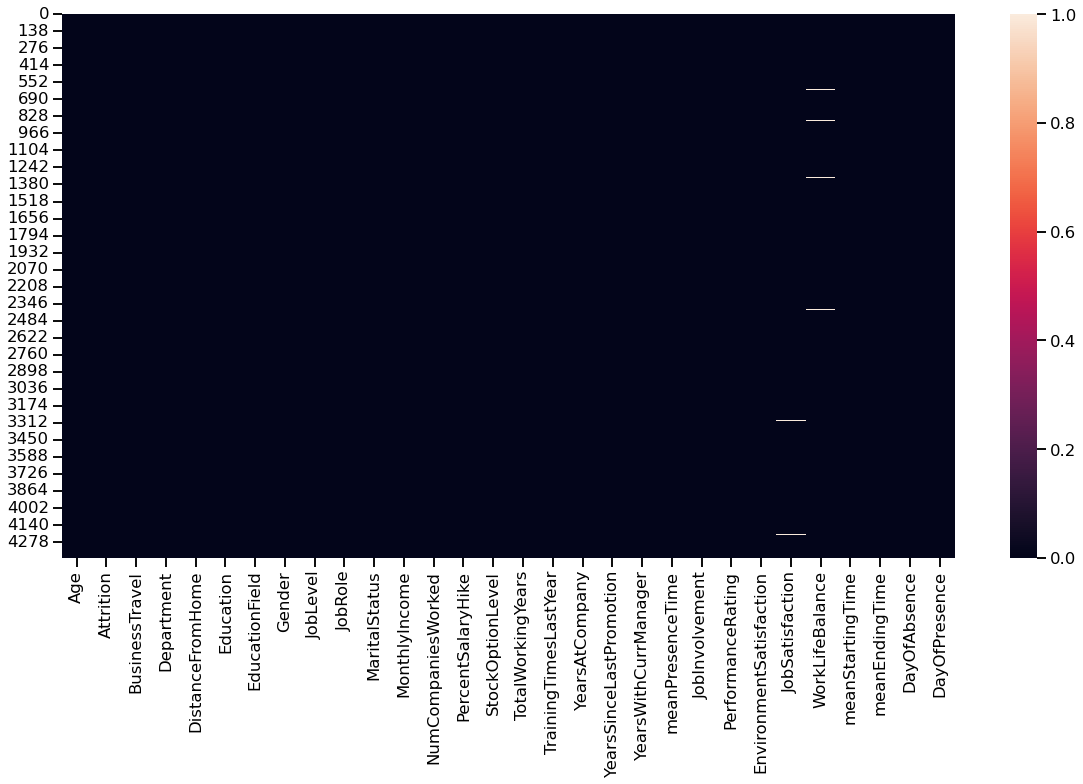

In [175]:
plt.figure(figsize=(20,10))
sns.heatmap(anlysis_df.isna())

On remarque qu'il ya quelques valeurs dans NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction et WorklifeBalance qui sont manquantes.
Mais globalement nos données sont complètes !

On va identifier le pourcentage de valeurs manquantes par colonnes :

In [176]:
(anlysis_df.isna().sum()/anlysis_df.shape[0]).sort_values(ascending=False)

WorkLifeBalance            0.008617
EnvironmentSatisfaction    0.005669
JobSatisfaction            0.004535
NumCompaniesWorked         0.004308
TotalWorkingYears          0.002041
TrainingTimesLastYear      0.000000
DayOfAbsence               0.000000
meanEndingTime             0.000000
meanStartingTime           0.000000
PerformanceRating          0.000000
JobInvolvement             0.000000
meanPresenceTime           0.000000
YearsWithCurrManager       0.000000
YearsSinceLastPromotion    0.000000
YearsAtCompany             0.000000
Age                        0.000000
Attrition                  0.000000
StockOptionLevel           0.000000
PercentSalaryHike          0.000000
MonthlyIncome              0.000000
MaritalStatus              0.000000
JobRole                    0.000000
JobLevel                   0.000000
Gender                     0.000000
EducationField             0.000000
Education                  0.000000
DistanceFromHome           0.000000
Department                 0

On peut maintenant analyser les différentes données à l'aide de graphiques :
On va créer un tableau avec le nom des colonnes qui sont des variables discrètes et un tableau avec les variables continues :

In [177]:
temp_data = anlysis_df["Attrition"].value_counts(normalize=True).mul(100).rename('percent')
temp_data

No     83.877551
Yes    16.122449
Name: percent, dtype: float64

On remarque que 16 % des employées quittent l'entreprise ce qui est presque égal à la donnée dans le contexte (15%)

In [178]:
disc = ["BusinessTravel", "Department", "Education", "EducationField", "Gender", "JobLevel", "JobRole", "MaritalStatus", "StockOptionLevel","EnvironmentSatisfaction", "WorkLifeBalance", "JobInvolvement", "PerformanceRating", "JobSatisfaction" ]
cont = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager", "meanPresenceTime","meanStartingTime", "meanEndingTime", "DayOfAbsence", "DayOfPresence"]

On va regarder la répartition des différentes valeurs discrètes

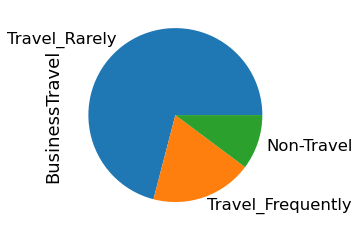

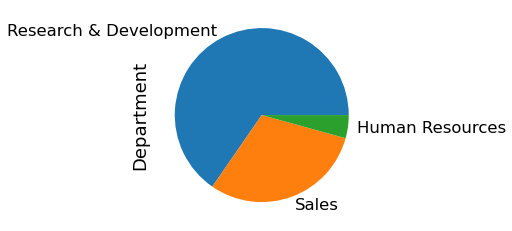

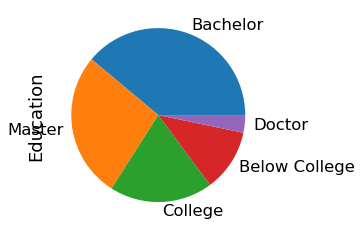

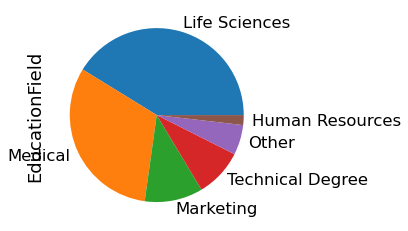

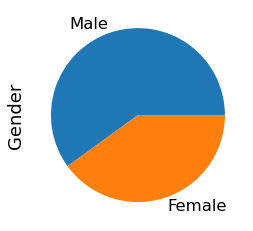

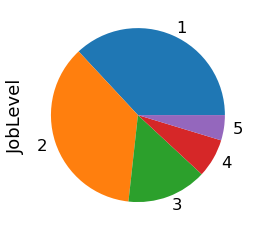

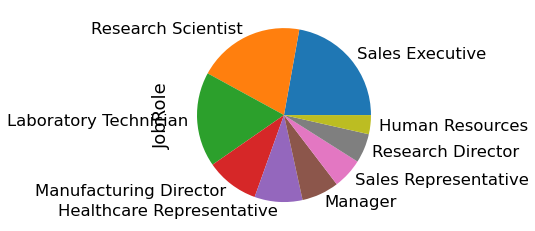

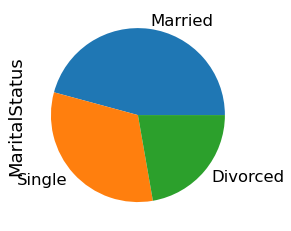

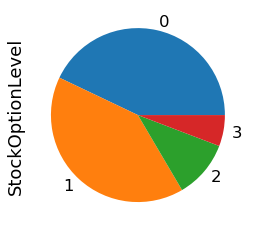

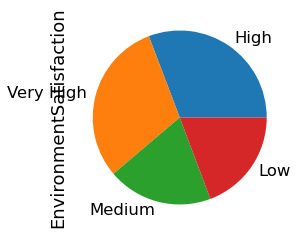

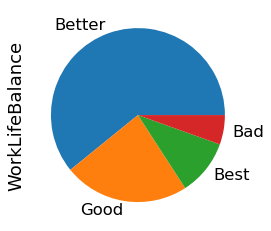

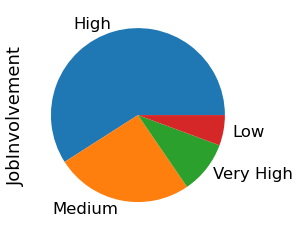

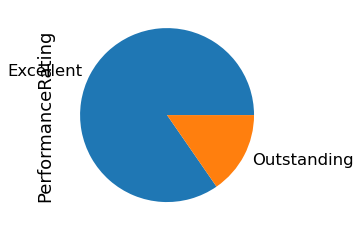

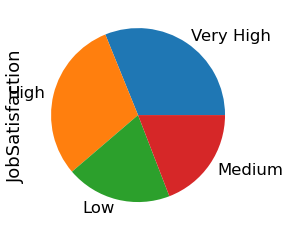

In [179]:
for col in disc:
    plt.figure()
    anlysis_df[col].value_counts().plot.pie()

On met ensuite en lien chaques classes avec l'attrition pour en tirer le pourcentage d'employé étant resté et ayant quitté l'entreprise

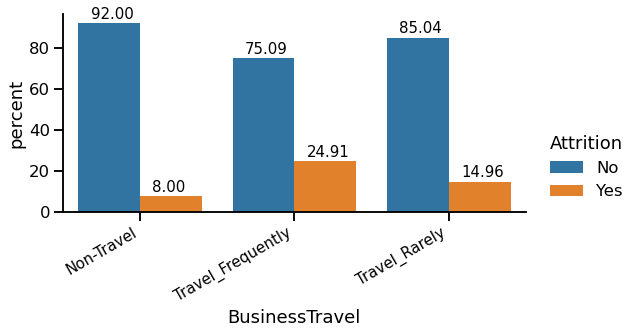

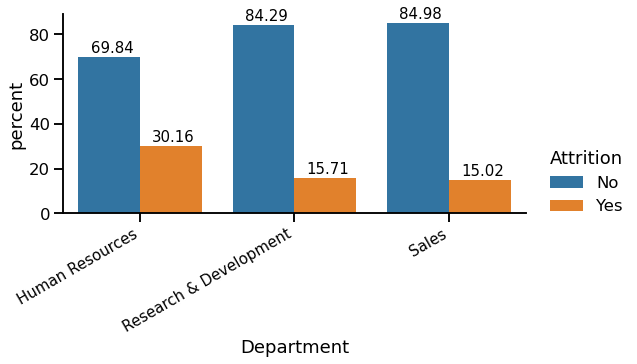

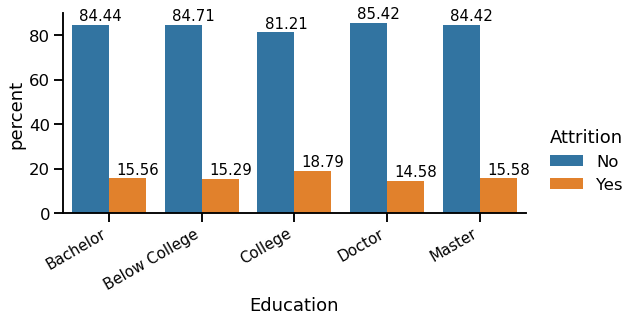

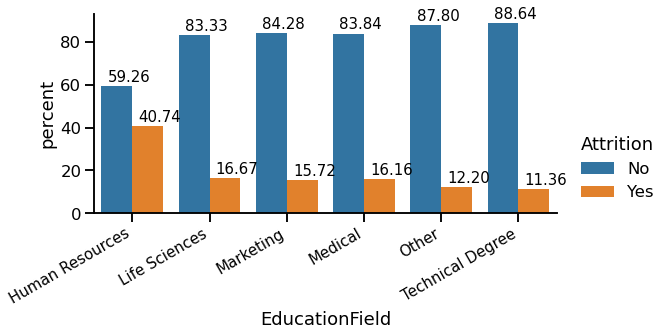

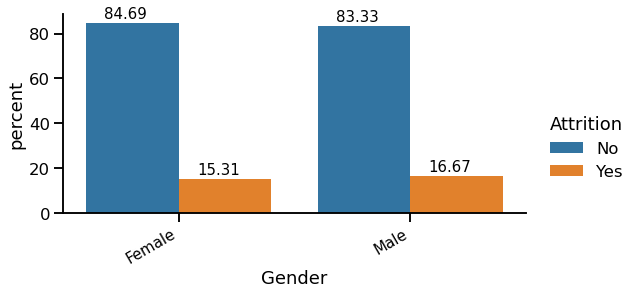

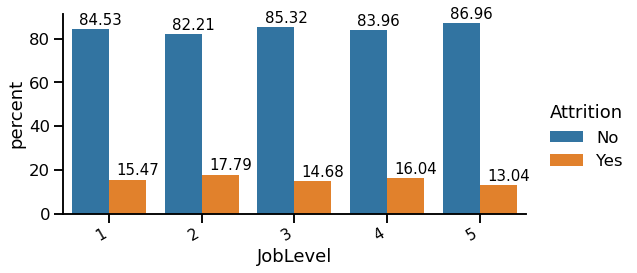

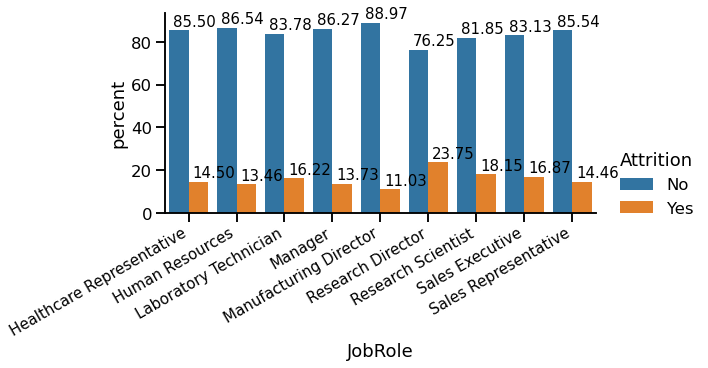

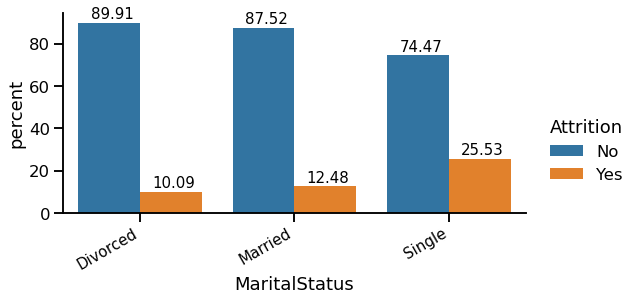

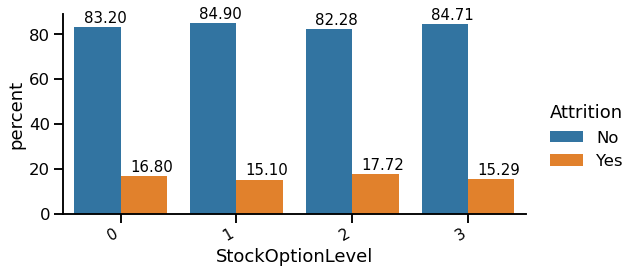

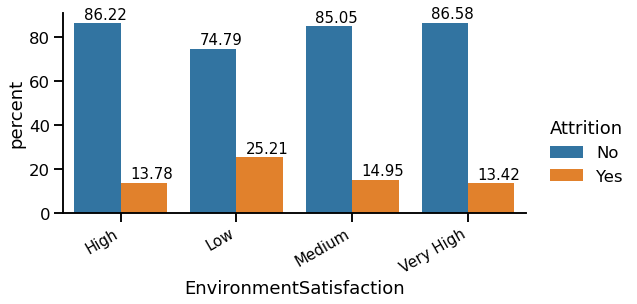

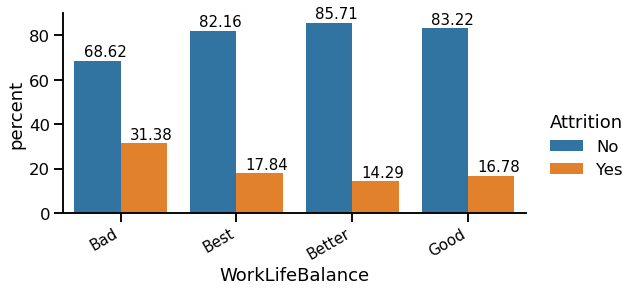

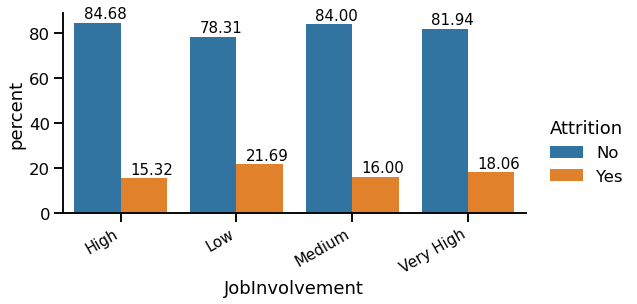

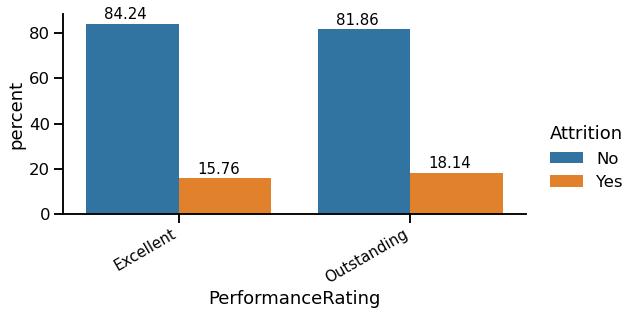

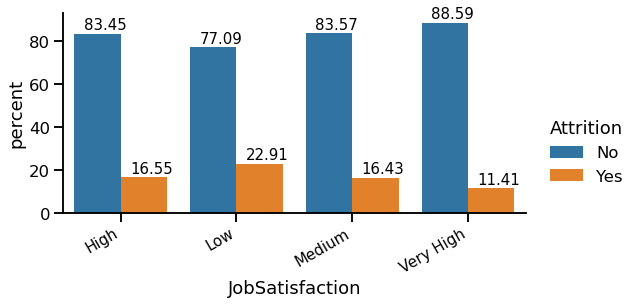

In [180]:
y = 'Attrition'

def add_annotation(cat, c):
    x1 = c.get_x() + c.get_width() / 2 - .12
    y1 = c.get_y() + c.get_height() + 2

    cat.ax.annotate(format(c.get_height(), ".2f"), (x1, y1), size=15)

def plot_hist(name, data, annot=True):

    x = name

    temp_data = (data
                 .groupby(x)[y]
                 .value_counts(normalize=True)
                 .mul(100)
                 .rename('percent')
                 .reset_index())
    sns.set_context('talk', font_scale = 1)
    catp = sns.catplot(data=temp_data, x=name, y='percent', hue='Attrition', kind='bar', height = 4, aspect = 2, legend_out=True, margin_titles=True)
    catp.set_xticklabels(rotation=30, fontsize=15, horizontalalignment='right',)

    if annot:
        spots = catp.ax.patches
        # need to separate in half de spots to put them in the right order (first half: Attrition=no; second half Attrition=yes)
        mid = len(spots) // 2

        for i in range(0, mid) :

            add_annotation(catp, spots[i])
            add_annotation(catp, spots[mid + i])

hue_order = ['No', 'Yes']

for name in disc:
    plot_hist(name, anlysis_df)

## Conclusion

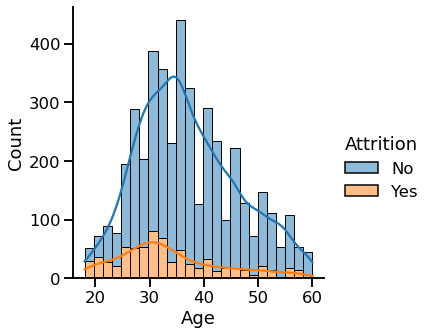

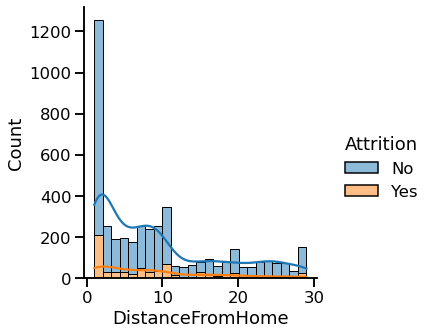

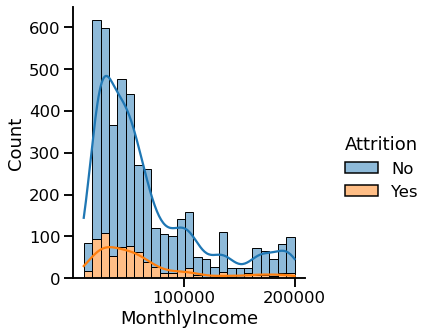

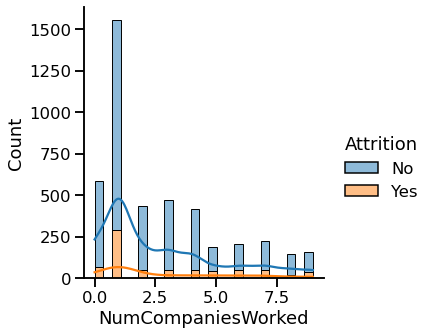

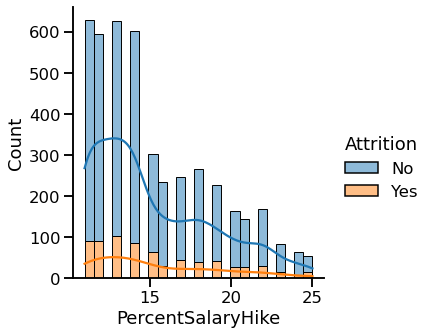

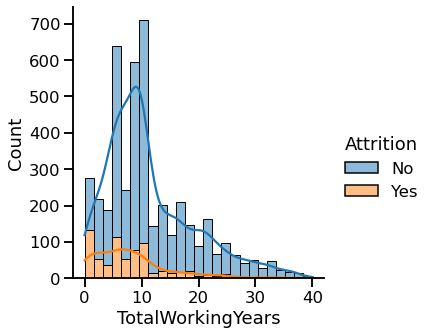

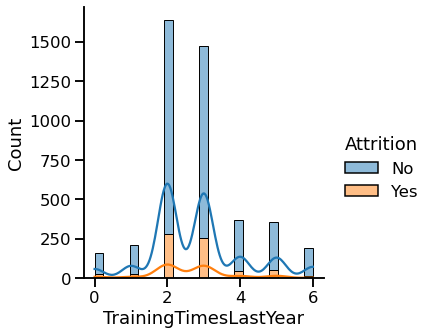

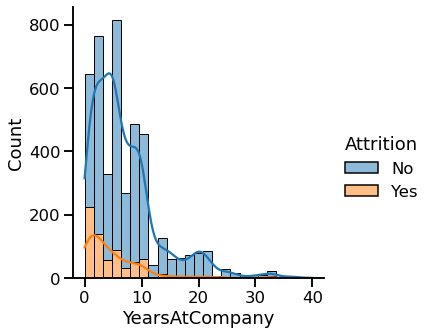

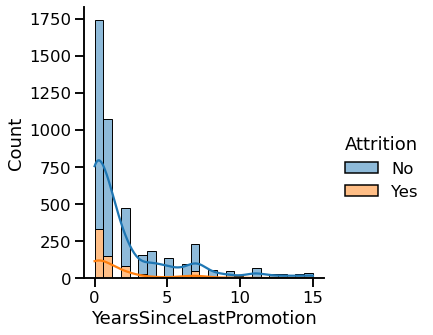

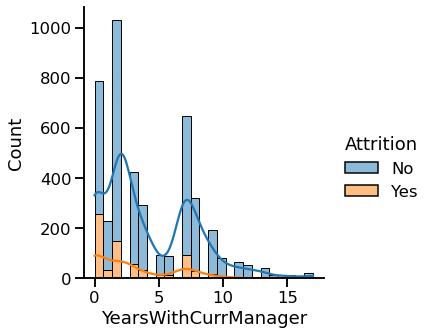

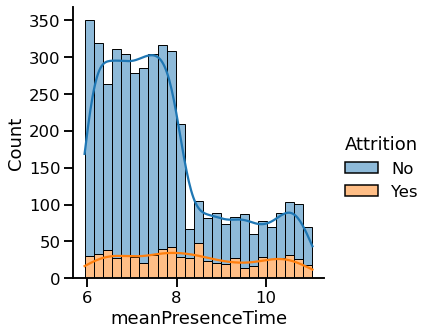

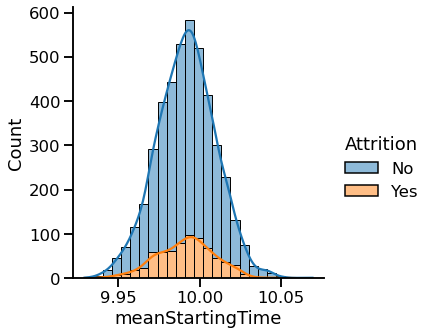

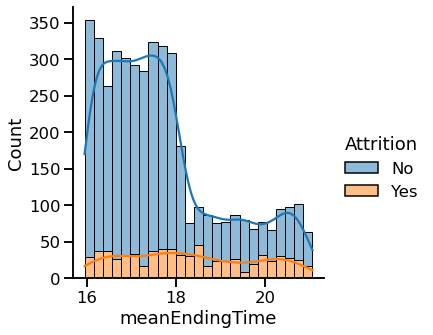

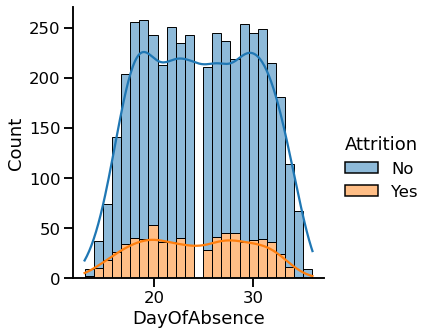

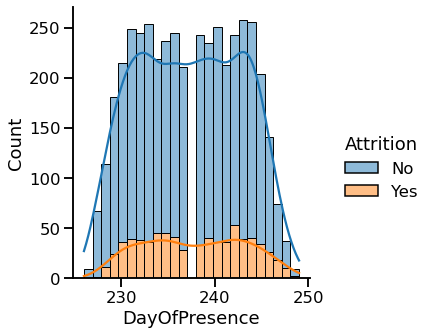

In [181]:
for name in cont:
    sns.displot(data=anlysis_df, x=name, hue="Attrition",multiple="stack", kde=True, bins=25)
    plt.show()

## Conclusion
En analysant les graphiques, on peut émettre l'analyse qu'il semblerait que l'âge ainsi que le nombre d'années dans l'entreprise sont liés au départ des employées

## Conclusion de l'analyse de données
- Quelques données manquantes mais pas assez pour s'en inquiter
- Nous n'avons presque pas de variable "discriminante" pour distinger si un employée va partir ou non

# Analyse plus détaillée
On va analyser les relations entre les variables continues :

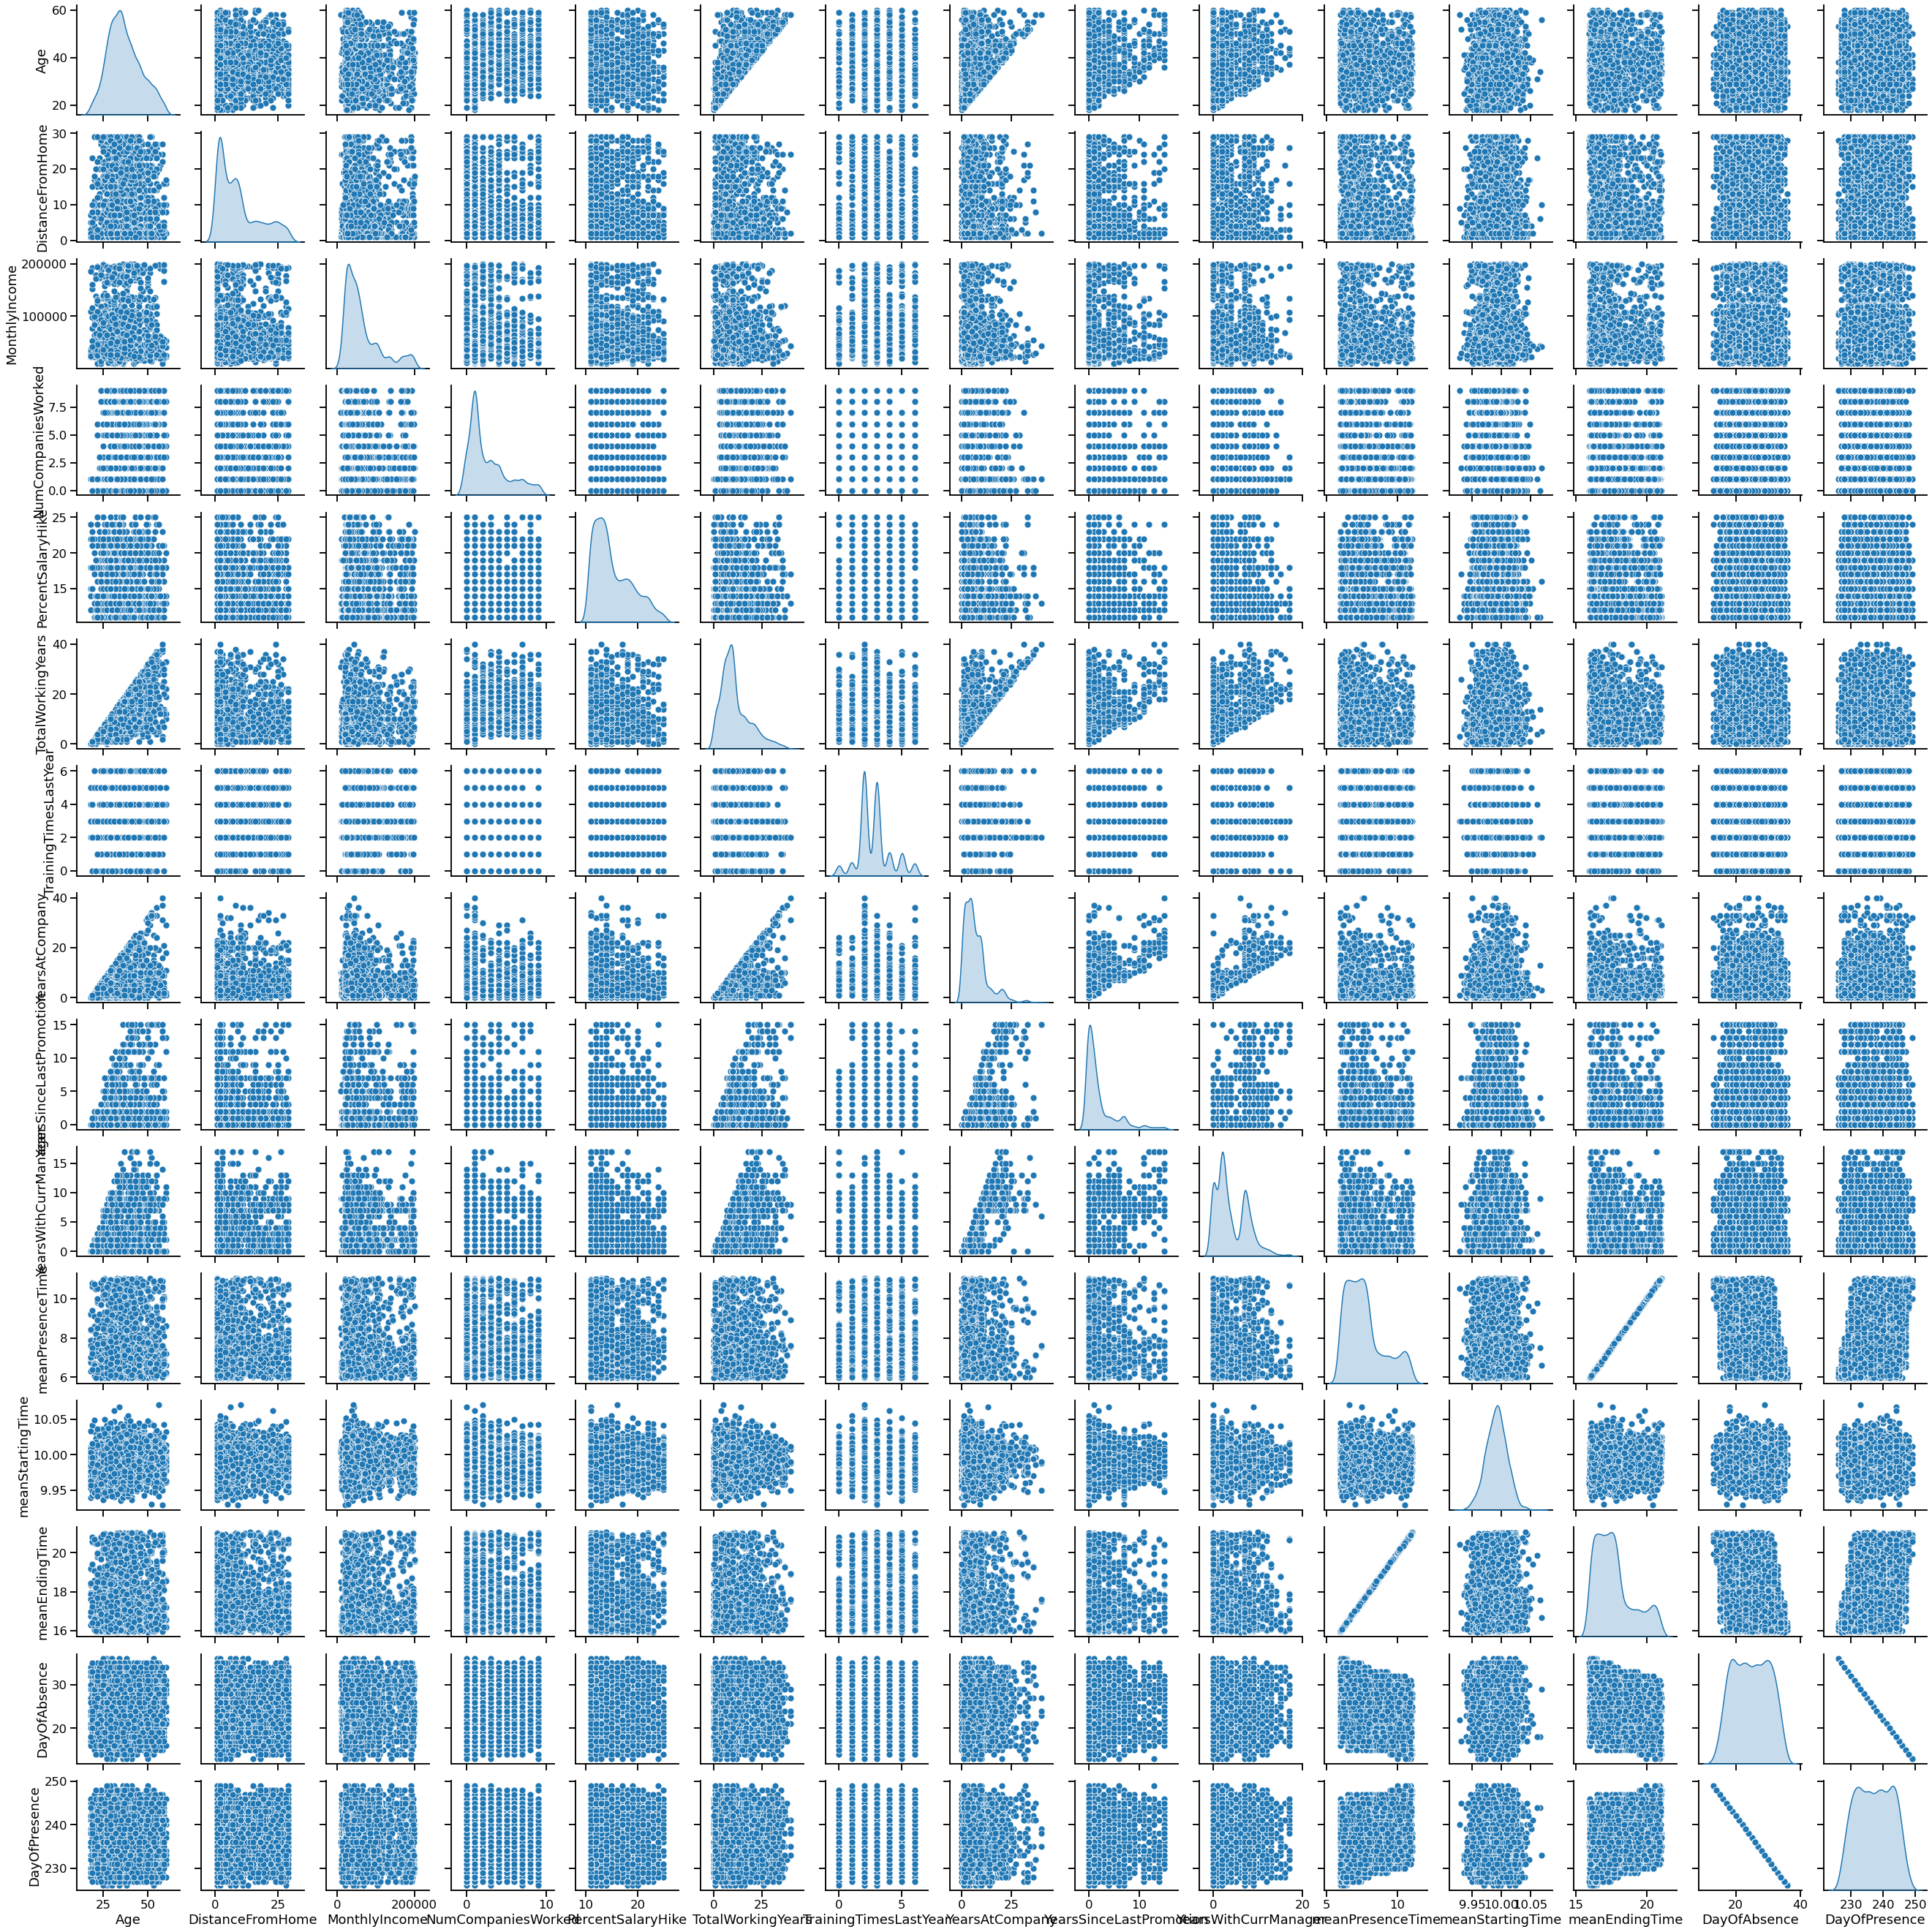

In [182]:
sns.pairplot(anlysis_df[cont], diag_kind='kde')
plt.show()

On remarque certaines relations claires entre :
 - DayOfAbsence et DayOfPresence
 - meanEndingTime et meanPresenceTime
Puis dans quelques graphiques il semble y avoir une relation mais ce n'est pas très flagrant visuellement :
 - meanEndingTime et DayOfAbsence
 - YearsWithCurrManager et YearsAtCompany

Pour avoir plus de précision on va faire une matrice de corrélation pour avoir des informations précises

<AxesSubplot:>

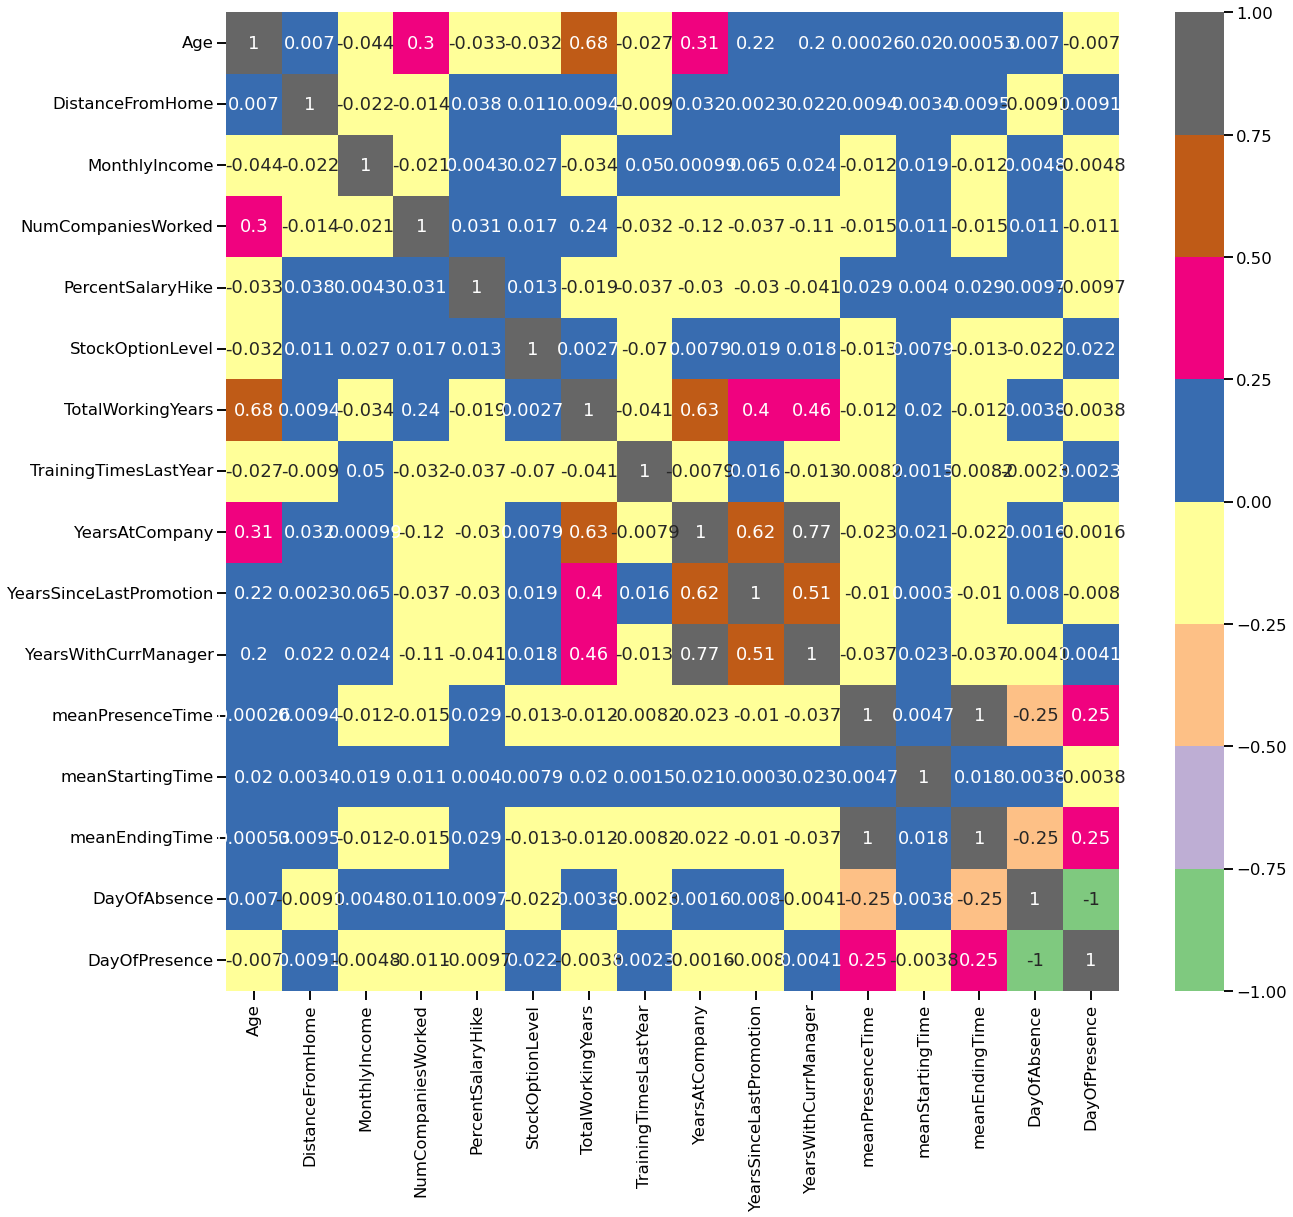

In [183]:
plt.figure(figsize=(20,18))
sns.heatmap(anlysis_df.corr(), annot = True, cmap="Accent")

On remarque des relations entre différentes features. Certaines variables sont corrélées : + 0.5

## Relation entre YearAtCompany et les variables continues :
On cherche à savoir si le nombre d'année dans l'entreprise a une influence sur les autres données  :

C:\Users\schub\AppData\Local\Temp/ipykernel_14412/3911497366.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

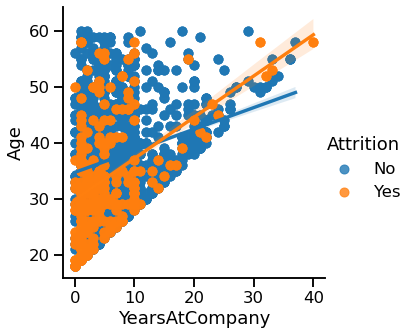

<Figure size 432x288 with 0 Axes>

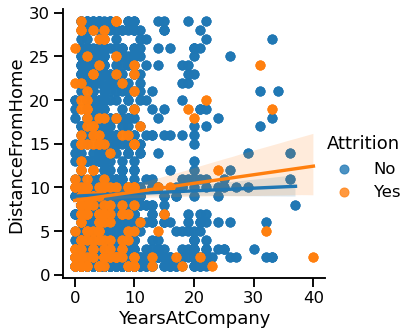

<Figure size 432x288 with 0 Axes>

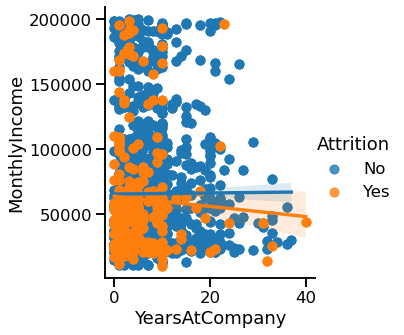

<Figure size 432x288 with 0 Axes>

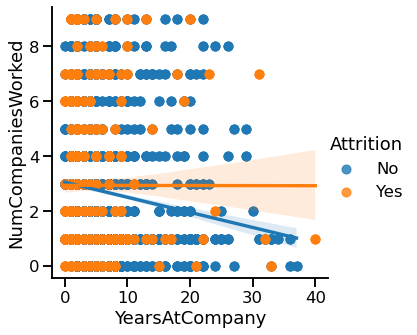

<Figure size 432x288 with 0 Axes>

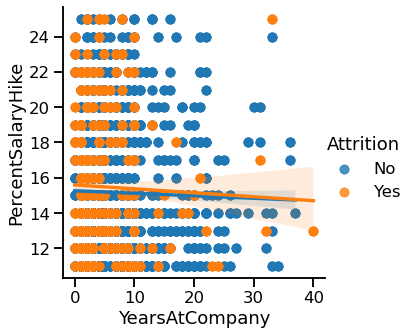

<Figure size 432x288 with 0 Axes>

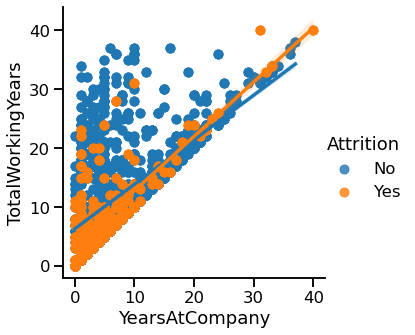

<Figure size 432x288 with 0 Axes>

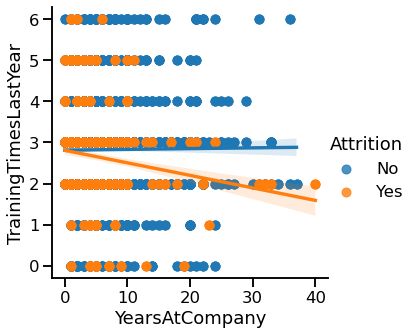

<Figure size 432x288 with 0 Axes>

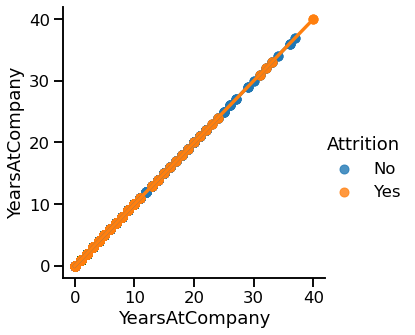

<Figure size 432x288 with 0 Axes>

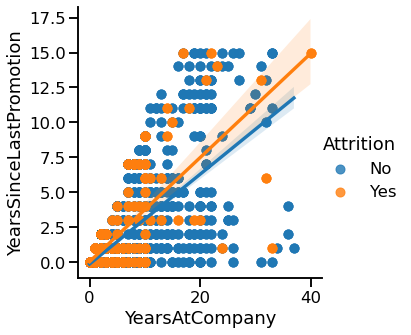

<Figure size 432x288 with 0 Axes>

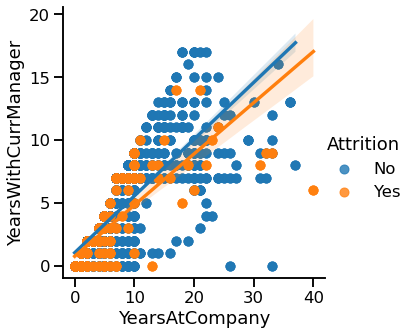

<Figure size 432x288 with 0 Axes>

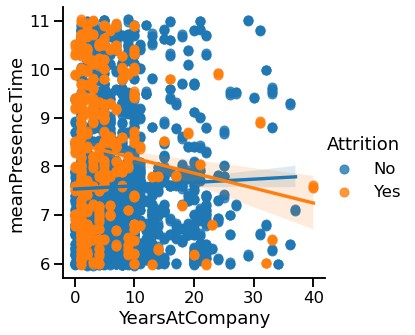

<Figure size 432x288 with 0 Axes>

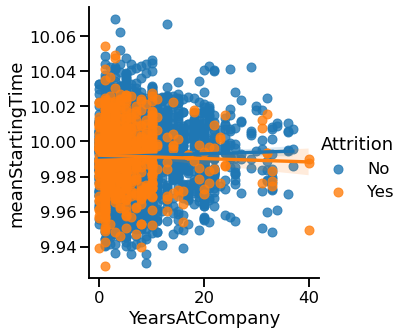

<Figure size 432x288 with 0 Axes>

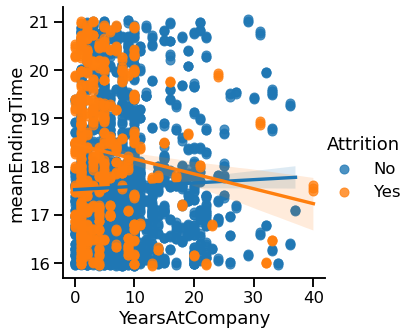

<Figure size 432x288 with 0 Axes>

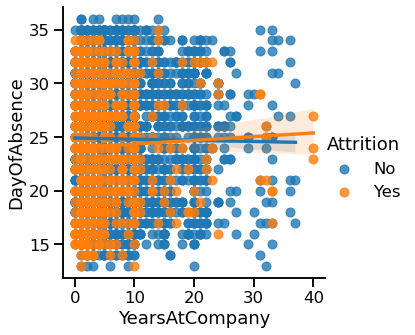

<Figure size 432x288 with 0 Axes>

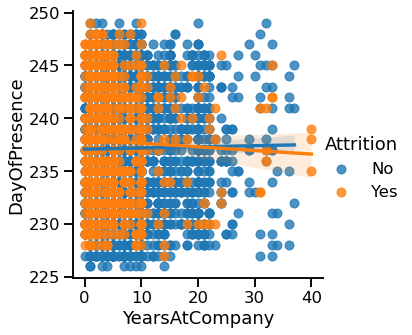

In [184]:
for col in cont:
    plt.figure()
    sns.lmplot(x="YearsAtCompany", y=col, hue="Attrition", data=anlysis_df)

In [185]:
anlysis_df.corr()['YearsAtCompany'].sort_values()

NumCompaniesWorked        -0.117959
PercentSalaryHike         -0.029707
meanPresenceTime          -0.022558
meanEndingTime            -0.022270
TrainingTimesLastYear     -0.007894
DayOfPresence             -0.001645
MonthlyIncome              0.000995
DayOfAbsence               0.001645
StockOptionLevel           0.007886
meanStartingTime           0.020739
DistanceFromHome           0.031684
Age                        0.311309
YearsSinceLastPromotion    0.618409
TotalWorkingYears          0.627703
YearsWithCurrManager       0.769212
YearsAtCompany             1.000000
Name: YearsAtCompany, dtype: float64

## Conclusion
Il semblerait que le nombre d'année dans l'entreprise a une influence sur le nombre d'année sous le manager actuel, le nombre d'année depuis la dernière promotion et le nombre d'heures total travaillé.

## Test de Student
On pose l'hypotèse H0 : Les jeunes on un taux de turnover égal aux plus vieux...
faire plusieurs hypothèses

In [186]:
staying_df = anlysis_df[anlysis_df["Attrition"] == "Yes"]
leaving_df = anlysis_df[anlysis_df["Attrition"] == "No"]

In [187]:
staying_df.shape

(711, 30)

In [188]:
leaving_df.shape

(3699, 30)

In [189]:
balanced_le = leaving_df.sample(staying_df.shape[0])

In [190]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_le[col].dropna(), staying_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [191]:
for col in cont:
    print(f'{col :-<50} {t_test(col)}')

Age----------------------------------------------- H0 Rejetée
DistanceFromHome---------------------------------- 0
MonthlyIncome------------------------------------- 0
NumCompaniesWorked-------------------------------- H0 Rejetée
PercentSalaryHike--------------------------------- 0
TotalWorkingYears--------------------------------- H0 Rejetée
TrainingTimesLastYear----------------------------- H0 Rejetée
YearsAtCompany------------------------------------ H0 Rejetée
YearsSinceLastPromotion--------------------------- 0
YearsWithCurrManager------------------------------ H0 Rejetée
meanPresenceTime---------------------------------- H0 Rejetée
meanStartingTime---------------------------------- 0
meanEndingTime------------------------------------ H0 Rejetée
DayOfAbsence-------------------------------------- H0 Rejetée
DayOfPresence------------------------------------- H0 Rejetée


# Étape 3 : Preprocessing
Le preprocessing permet de formater les données (encodage, nettoyage, train et test) et d'améliorer les performances des modèles

In [192]:
processing_df = general.copy()

 On créé de nouvelles colonnes pour chaque valeurs discrètes pour les rendres continues

In [193]:
dummy1 = pd.get_dummies(processing_df[disc], drop_first=True)
dummies_df = pd.concat([processing_df, dummy1], axis=1)

In [194]:
dummies_df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   JobRole_Human Resources JobRole_Laboratory Technician JobRole_Manager  \
0                        0                             0               0   
1                        0                             0               0   
2                        0                             0               0   
3                        1                             0               0   
4                        0                             0               0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

  JobRole_Research Scientist  JobRole_Sales Executive  \
0                          0                        0   
1                          1                        0   
2                          0                        1   
3                          0                        0   
4                          0                        1   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                             0                      1                     0  
1                             0                      0                     1  
2                             0                      1                     0  
3                             0                      1                     0  
4                             0                      0                     1  

[5 rows x 62 columns]

On drop les variables discètes de départ

In [195]:
dummies_df = dummies_df.drop(['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
              'JobSatisfaction', 'WorkLifeBalance','BusinessTravel', 'Department',
              'Education','EducationField', 'Gender', 'JobLevel', 'JobRole',
              'MaritalStatus'], 1)

C:\Users\schub\AppData\Local\Temp/ipykernel_14412/3439345269.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dummies_df = dummies_df.drop(['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',


In [196]:
dummies_df.drop(['EmployeeID', 'EmployeeCount','StandardHours','Over18'], axis = 1,inplace=True)

In [197]:
dummies_df.head()

Age Attrition  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0   51        No                 6         131160                 1.0   
1   31       Yes                10          41890                 0.0   
2   32        No                17         193280                 1.0   
3   38        No                 2          83210                 3.0   
4   32        No                10          23420                 4.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  ...  JobRole_Human Resources  \
0                      6               1  ...                        0   
1                      3               5  ...                        0   
2                      2               5  ...                        0   
3                      5               8  ...                        1   
4                      2               6  ...                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              0                0   
3                              0                0   
4                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        0   
1                           1                        0   
2                           0                        1   
3                           0                        0   
4                           0                        1   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                             0                      1                     0  
1                             0                      0                     1  
2                             0                      1                     0  
3                             0                      1                     0  
4                             0                      0                     1  

[5 rows x 38 columns]

On sépare notre jeu en deux :
- X_dummies qui contient toutes nos variables sur les employés
- y_dummies qui contient uniquement l'Attrition au format binaire (0 ou 1)

In [198]:
dummies_df['Attrition'] = dummies_df['Attrition'].replace({'Yes': 1, "No": 0})

In [199]:
from sklearn.model_selection import train_test_split
X_dummies = dummies_df.drop(['Attrition'], axis=1)

X_dummies.head(100)

Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0    51                 6         131160                 1.0   
1    31                10          41890                 0.0   
2    32                17         193280                 1.0   
3    38                 2          83210                 3.0   
4    32                10          23420                 4.0   
..  ...               ...            ...                 ...   
95   37                 8          54670                 4.0   
96   30                25          53800                 7.0   
97   26                28          51510                 1.0   
98   42                 2          21330                 3.0   
99   21                 9         178750                 1.0   

    PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                  11                 0                1.0   
1                  23                 1                6.0   
2                  15                 3                5.0   
3                  11                 3               13.0   
4                  12                 2                9.0   
..                ...               ...                ...   
95                 12                 0               13.0   
96                 21                 1                4.0   
97                 15                 3                8.0   
98                 13                 2               14.0   
99                 12                 0                3.0   

    TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  ...  \
0                       6               1                        0  ...   
1                       3               5                        1  ...   
2                       2               5                        0  ...   
3                       5               8                        7  ...   
4                       2               6                        0  ...   
..                    ...             ...                      ...  ...   
95                      2               7                        6  ...   
96                      0               2                        2  ...   
97                      3               8                        7  ...   
98                      2               1                        0  ...   
99                      5               3                        1  ...   

    JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                         0                              0                0   
1                         0                              0                0   
2                         0                              0                0   
3                         1                              0                0   
4                         0                              0                0   
..                      ...                            ...              ...   
95                        0                              0                0   
96                        0                              0                0   
97                        0                              1                0   
98                        0                              1                0   
99                        0                              0                0   

    JobRole_Manufacturing Director  JobRole_Research Director  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
..                             ...                        ...   
95                               1                          0   
96                               0                          0   
97                               0                     

In [200]:
y_dummies = dummies_df['Attrition']

y_dummies.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

On créé nos jeux de test et de train à partir de nos jeux X et y

In [201]:
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies, y_dummies, train_size=0.7, test_size=0.3, random_state=100)

Les algorithmes ne fonctionne pas très bien lorsque nos variables sont à des échelles différentes (MonthlyIncome varie entre 0 et 200000 alors que NumCompaniesWorked entre 0 et 10)

Pour cela, on mappe la moyenne sur zero avec StandardScaler

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_dummies.loc[:,cont] = scaler.fit_transform(X_train_dummies.loc[:,cont])

X_train_dummies.head()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
537   0.030760         -0.283046       0.152540           -0.289210   
1881  0.250309          0.085061       0.056813            1.712460   
2367  0.250309         -0.896558       0.178452           -1.089877   
3619  0.250309          2.416405      -0.207879            1.312126   
1398  0.360084          0.207763       0.122987           -0.689544   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
537            1.583604                 0          -0.415194   
1881          -1.157403                 0          -0.415194   
2367           0.487201                 0                NaN   
3619          -0.609202                 2           1.257239   
1398           1.309504                 2           1.257239   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  ...  \
537                2.444365       -0.982464                -0.690579  ...   
1881               0.128532       -0.818401                -0.065779  ...   
2367               1.672421        0.494102                -0.690579  ...   
3619               0.128532        1.970667                 3.995420  ...   
1398              -0.643412        2.134730                 2.121020  ...   

      JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
537                         0                              0                0   
1881                        1                              0                0   
2367                        0                              1                0   
3619                        0                              1                0   
1398                        0                              0                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
537                                0                          0   
1881                               0                          0   
2367                               0                          0   
3619                               0                          0   
1398                               0                          0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
537                            0                        1   
1881                           0                        0   
2367                           0                        0   
3619                           0                        0   
1398                           0                        1   

      JobRole_Sales Representative  MaritalStatus_Married  \
537                              0                      0   
1881                             0                      1   
2367                             0                      0   
3619                             0                      0   
1398                             0                      1   

      MaritalStatus_Single  
537                      0  
1881                     0  
2367                     0  
3619                     0  
1398                     0  

[5 rows x 37 columns]

In [203]:
X_test_dummies.loc[:,cont] = scaler.transform(X_test_dummies.loc[:,cont])

X_test_dummies.head()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
4020 -0.737663          0.330466      -0.317097           -0.689544   
1697 -1.066987          1.557489      -0.904732           -1.089877   
2481  0.689407          0.821275       0.075231           -1.089877   
1039 -1.176761         -0.896558       0.031543           -1.089877   
93   -0.518113         -0.896558      -0.146418           -0.689544   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
4020          -0.883302                 2          -1.315735   
1697          -0.335101                 1          -0.672491   
2481           0.213101                 1          -0.157897   
1039          -0.061000                 2          -0.672491   
93            -0.609202                 0          -0.415194   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  ...  \
4020               0.128532       -0.982464                -0.690579  ...   
1697               0.900477       -0.326212                -0.690579  ...   
2481              -0.643412        0.330039                -0.378179  ...   
1039               0.128532       -0.326212                -0.378179  ...   
93                -2.187301        0.165976                -0.690579  ...   

      JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
4020                        0                              0                0   
1697                        0                              0                0   
2481                        0                              1                0   
1039                        0                              0                0   
93                          0                              0                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
4020                               0                          0   
1697                               0                          0   
2481                               0                          0   
1039                               0                          0   
93                                 0                          0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
4020                           0                        1   
1697                           0                        0   
2481                           0                        0   
1039                           0                        1   
93                             1                        0   

      JobRole_Sales Representative  MaritalStatus_Married  \
4020                             0                      0   
1697                             1                      0   
2481                             0                      0   
1039                             0                      1   
93                               0                      1   

      MaritalStatus_Single  
4020                     1  
1697                     0  
2481                     1  
1039                     0  
93                       0  

[5 rows x 37 columns]

In [204]:
X_test_dummies.shape

(1323, 37)

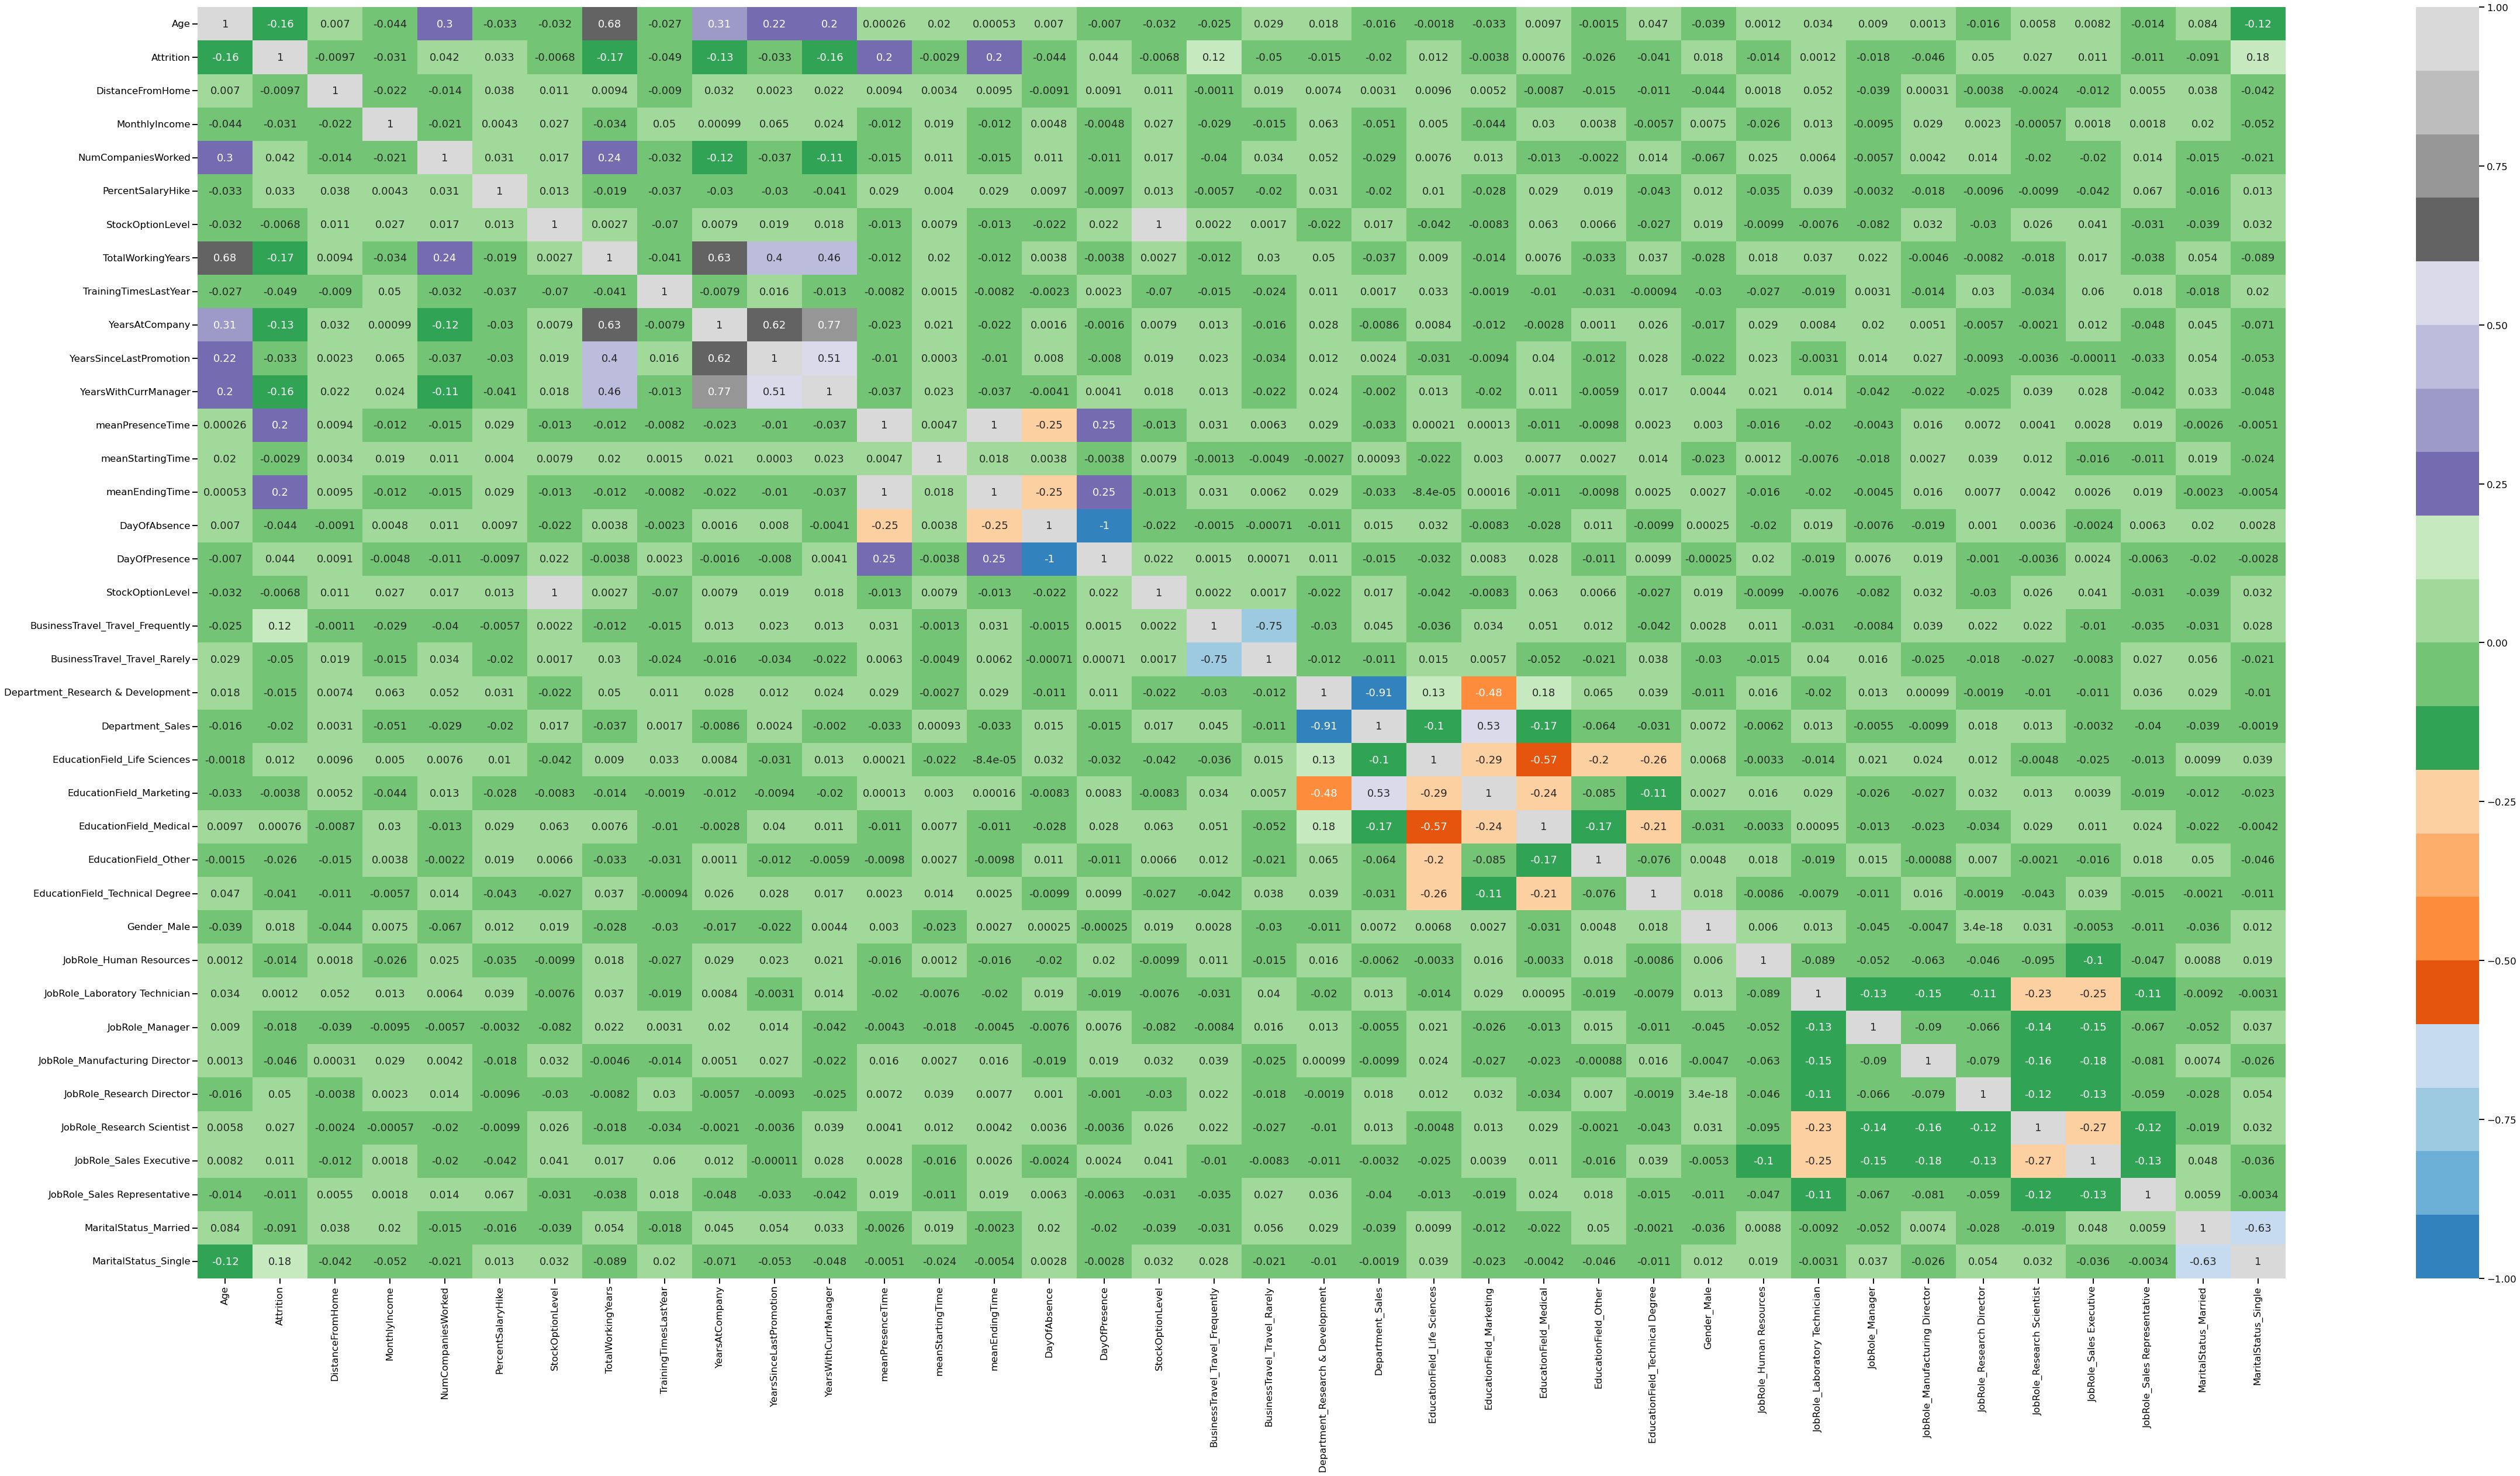

In [205]:
plt.figure(figsize = (80,40))
sns.heatmap(dummies_df.corr(),annot = True,cmap="tab20c")
plt.show()

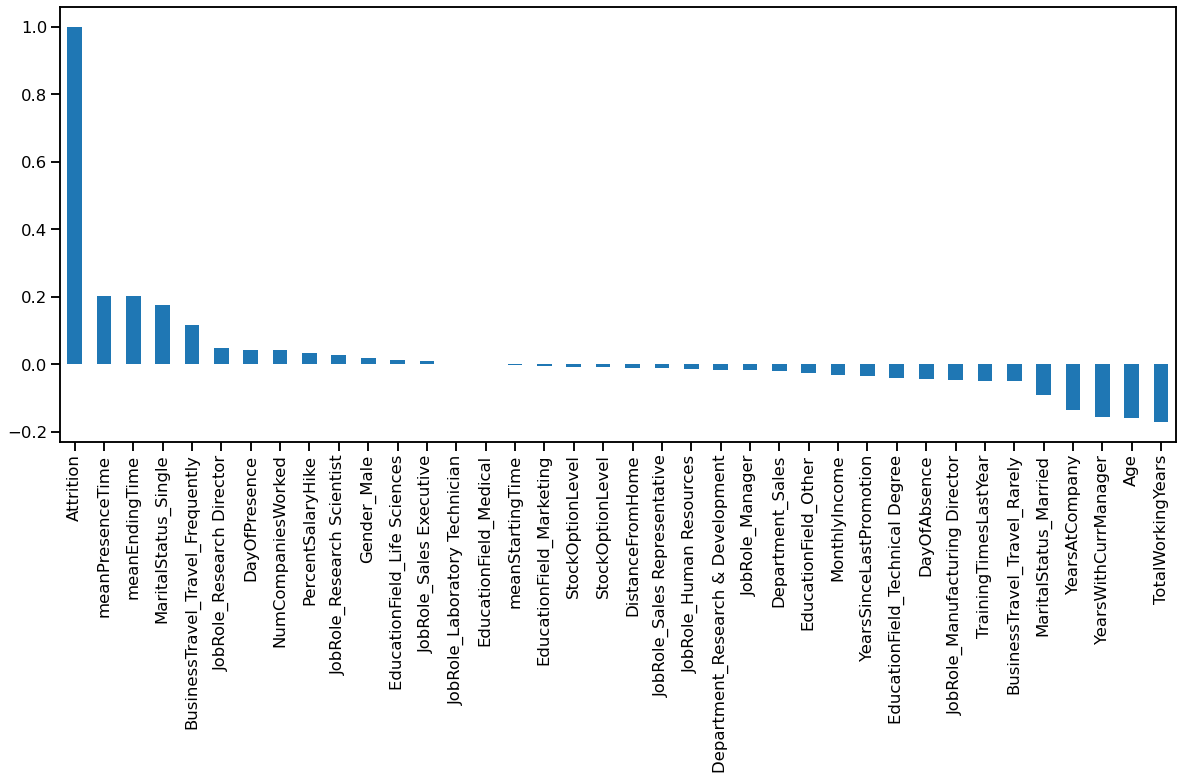

In [206]:
plt.figure(figsize=(20,8))
dummies_df.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar');

On génère un tableau de corrélation entre chaque variable pour en tirer les 50 meilleurs

In [207]:
corrmat = X_train_dummies.corr()
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
matrix= corrdf.sort_values(by = 'Correlation', ascending = False).head(50)
matrix

Var1                               Var2  \
569                     DayOfPresence                       DayOfAbsence   
492                    meanEndingTime                   meanPresenceTime   
597                  StockOptionLevel                   StockOptionLevel   
759                  Department_Sales  Department_Research & Development   
378              YearsWithCurrManager                     YearsAtCompany   
683      BusinessTravel_Travel_Rarely   BusinessTravel_Travel_Frequently   
222                 TotalWorkingYears                                Age   
1367             MaritalStatus_Single              MaritalStatus_Married   
302                    YearsAtCompany                  TotalWorkingYears   
341           YearsSinceLastPromotion                     YearsAtCompany   
872            EducationField_Medical       EducationField_Life Sciences   
834          EducationField_Marketing                   Department_Sales   
379              YearsWithCurrManager            YearsSinceLastPromotion   
376              YearsWithCurrManager                  TotalWorkingYears   
833          EducationField_Marketing  Department_Research & Development   
339           YearsSinceLastPromotion                  TotalWorkingYears   
296                    YearsAtCompany                                Age   
111                NumCompaniesWorked                                Age   
835          EducationField_Marketing       EducationField_Life Sciences   
1253          JobRole_Sales Executive         JobRole_Research Scientist   
946   EducationField_Technical Degree       EducationField_Life Sciences   
225                 TotalWorkingYears                 NumCompaniesWorked   
1249          JobRole_Sales Executive      JobRole_Laboratory Technician   
568                     DayOfPresence                     meanEndingTime   
529                      DayOfAbsence                   meanPresenceTime   
566                     DayOfPresence                   meanPresenceTime   
531                      DayOfAbsence                     meanEndingTime   
873            EducationField_Medical           EducationField_Marketing   
370              YearsWithCurrManager                                Age   
1212       JobRole_Research Scientist      JobRole_Laboratory Technician   
948   EducationField_Technical Degree             EducationField_Medical   
333           YearsSinceLastPromotion                                Age   
909              EducationField_Other       EducationField_Life Sciences   
1251          JobRole_Sales Executive     JobRole_Manufacturing Director   
911              EducationField_Other             EducationField_Medical   
870            EducationField_Medical  Department_Research & Development   
871            EducationField_Medical                   Department_Sales   
1214       JobRole_Research Scientist     JobRole_Manufacturing Director   
1138   JobRole_Manufacturing Director      JobRole_Laboratory Technician   
1250          JobRole_Sales Executive                    JobRole_Manager   
1291     JobRole_Sales Representative            JobRole_Sales Executive   
1213       JobRole_Research Scientist                    JobRole_Manager   
796      EducationField_Life Sciences  Department_Research & Development   
1252          JobRole_Sales Executive          JobRole_Research Director   
1332             MaritalStatus_Single                                Age   
1101                  JobRole_Manager      JobRole_Laboratory Technician   
1290     JobRole_Sales Representative         JobRole_Research Scientist   
947   EducationField_Technical Degree           EducationField_Marketing   
1286     JobRole_Sales Representative      JobRole_Laboratory Technician   
1175        JobRole_Research Director      JobRole_Laboratory Technician   

      Correlation  
569          1.00  
492          1.00  
597          1.00  
759          0.90  
378          0.78  
683          0.74  
222          0.6

In [208]:
unique=list(set(matrix.Var2))
len(unique)

22

In [209]:
unique

['Department_Research & Development',
 'YearsSinceLastPromotion',
 'JobRole_Sales Executive',
 'EducationField_Medical',
 'MaritalStatus_Married',
 'Department_Sales',
 'JobRole_Manufacturing Director',
 'EducationField_Marketing',
 'JobRole_Manager',
 'NumCompaniesWorked',
 'meanPresenceTime',
 'meanEndingTime',
 'JobRole_Laboratory Technician',
 'Age',
 'TotalWorkingYears',
 'EducationField_Life Sciences',
 'DayOfAbsence',
 'BusinessTravel_Travel_Frequently',
 'StockOptionLevel',
 'JobRole_Research Director',
 'YearsAtCompany',
 'JobRole_Research Scientist']

In [210]:
X_test_dummies = X_test_dummies.drop(unique,1)
X_train_dummies = X_train_dummies.drop(unique,1)

C:\Users\schub\AppData\Local\Temp/ipykernel_14412/1086876583.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test_dummies = X_test_dummies.drop(unique,1)
C:\Users\schub\AppData\Local\Temp/ipykernel_14412/1086876583.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_dummies = X_train_dummies.drop(unique,1)


In [211]:
X_test_dummies.shape

(1323, 14)

In [212]:
X_test_dummies.head()

DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
4020          0.330466      -0.317097          -0.883302   
1697          1.557489      -0.904732          -0.335101   
2481          0.821275       0.075231           0.213101   
1039         -0.896558       0.031543          -0.061000   
93           -0.896558      -0.146418          -0.609202   

      TrainingTimesLastYear  YearsWithCurrManager  meanStartingTime  \
4020               0.128532             -1.160407          0.616207   
1697               0.900477             -0.318664         -0.062545   
2481              -0.643412              1.084240         -0.525781   
1039               0.128532             -0.038083          0.372887   
93                -2.187301              0.803659          0.084046   

      DayOfPresence  BusinessTravel_Travel_Rarely  EducationField_Other  \
4020      -0.227857                             1                     0   
1697      -0.948917                             1                     0   
2481      -0.768652                             1                     0   
1039      -1.129182                             1                     0   
93        -0.948917                             1                     0   

      EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
4020                                0            0                        0   
1697                                0            1                        0   
2481                                0            0                        0   
1039                                1            0                        0   
93                                  0            1                        0   

      JobRole_Sales Representative  MaritalStatus_Single  
4020                             0                     1  
1697                             1                     0  
2481                             0                     1  
1039                             0                     0  
93                               0                     0

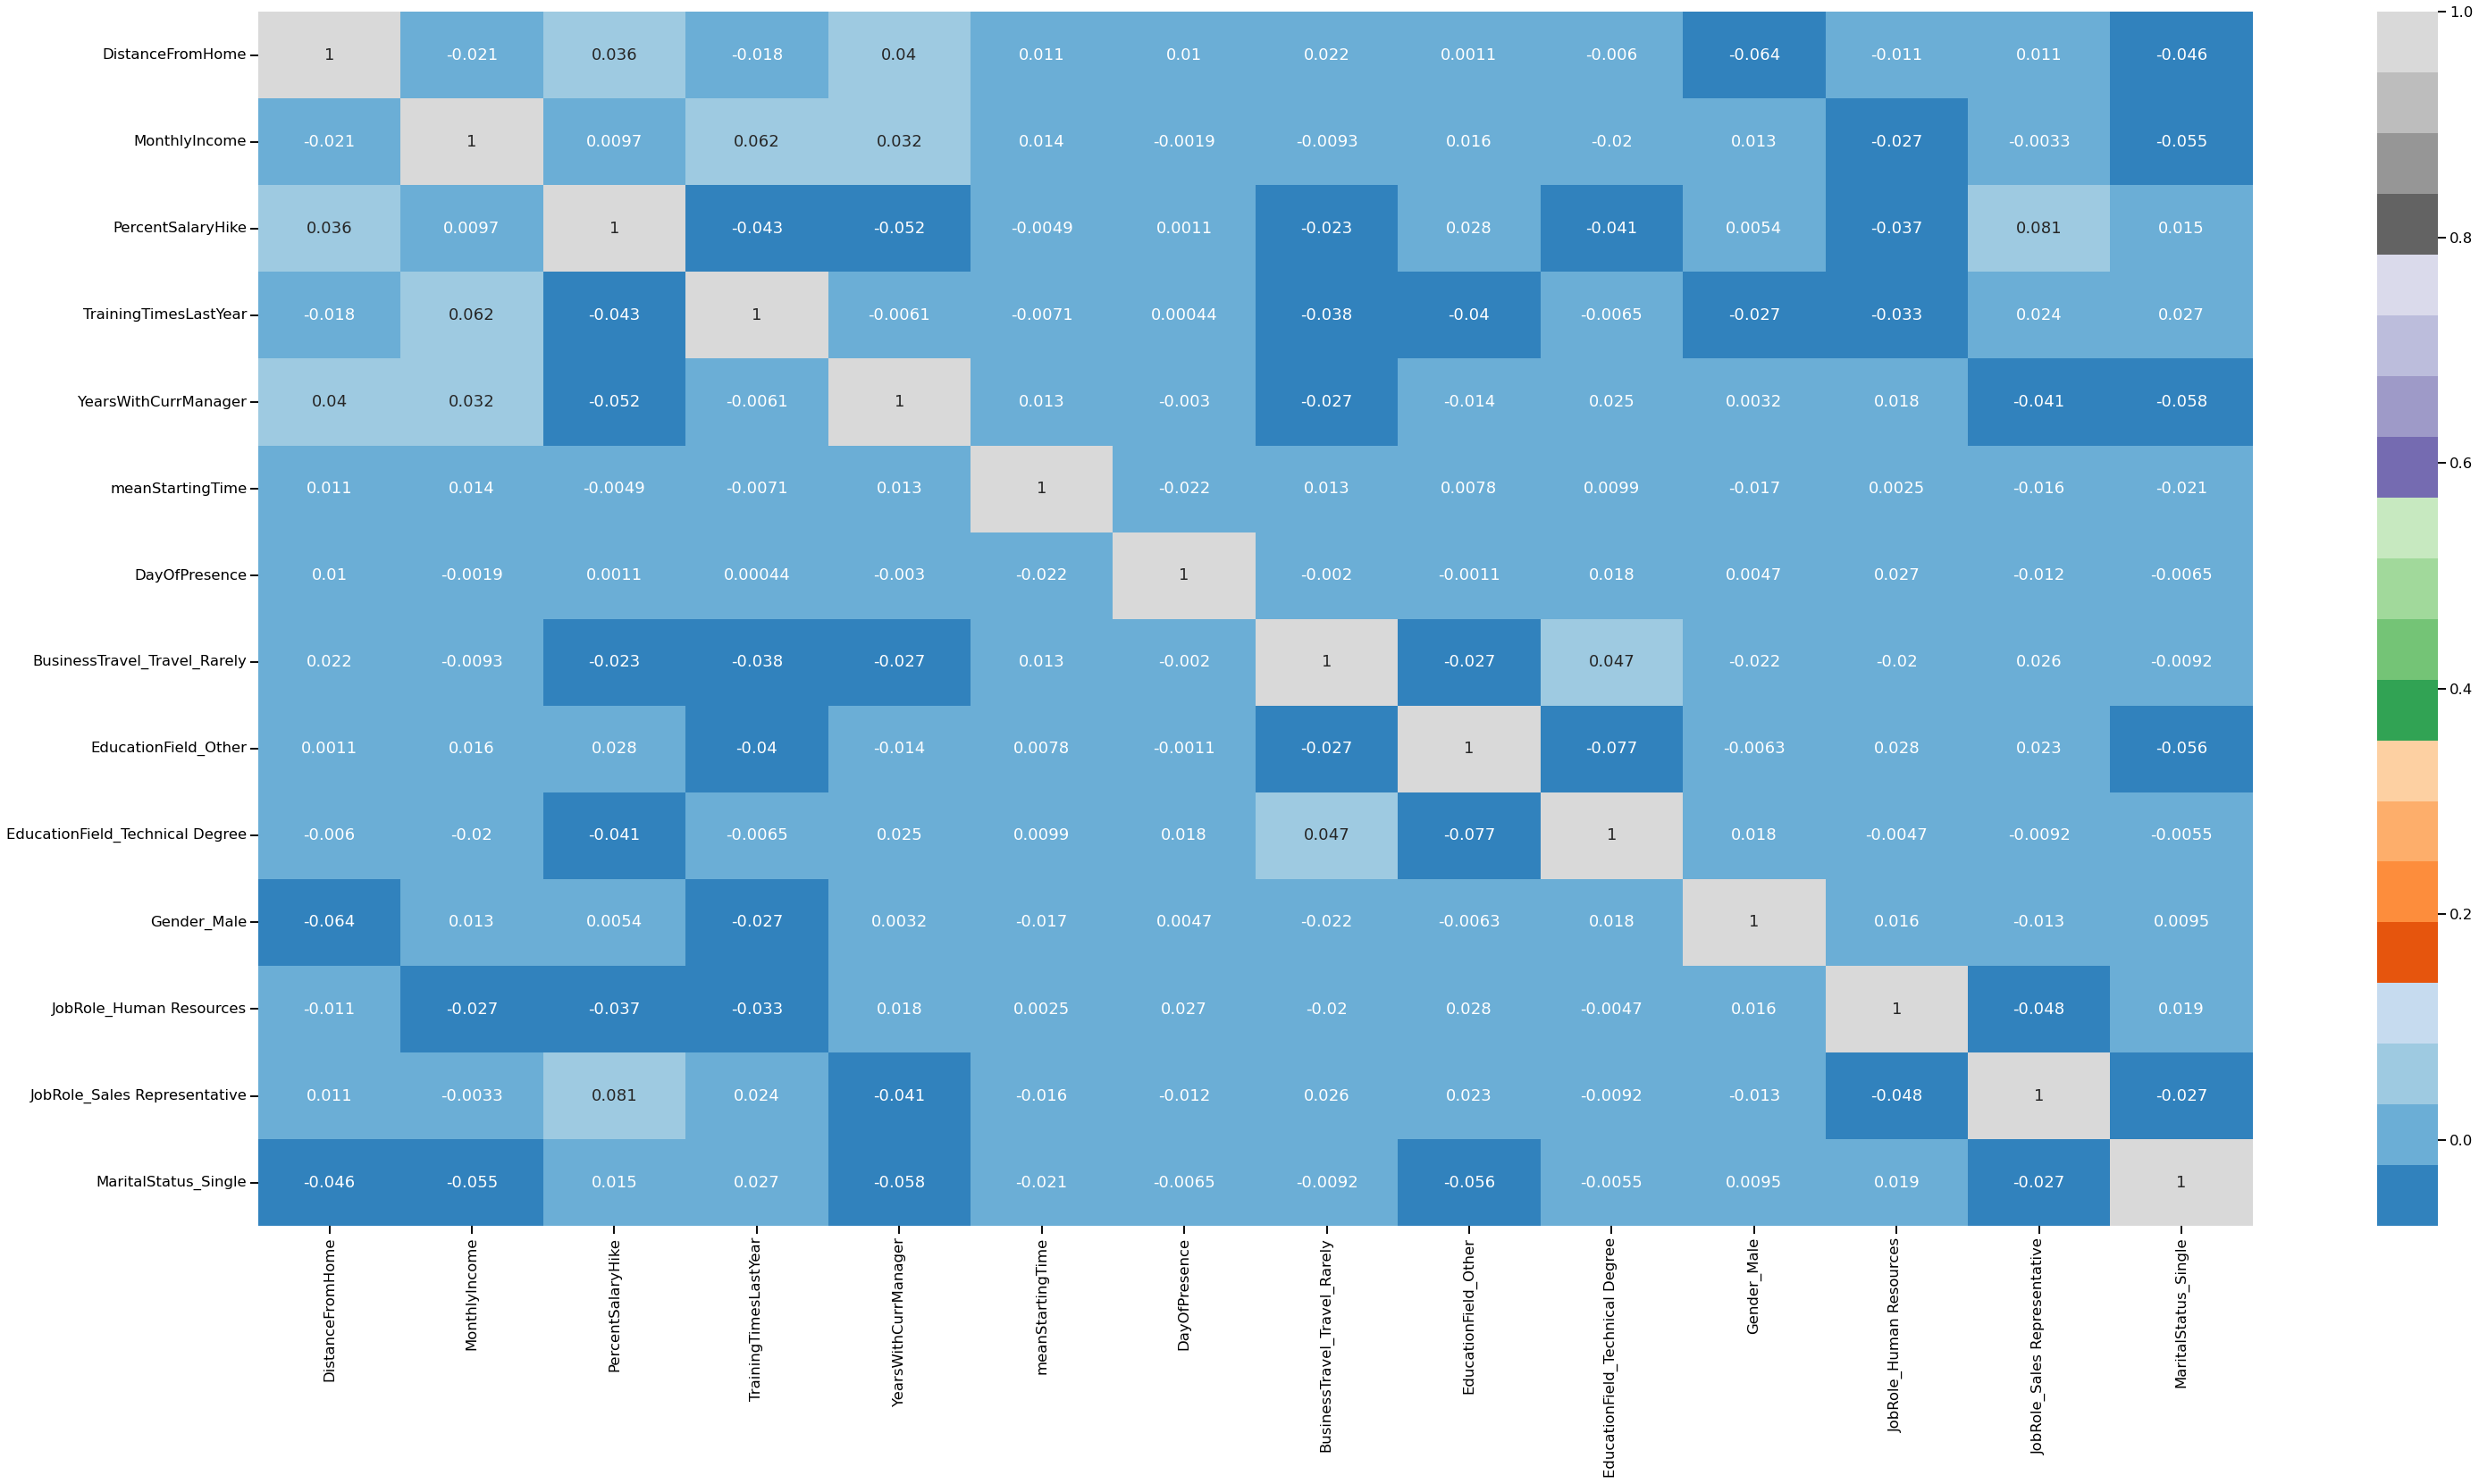

In [213]:
plt.figure(figsize = (50,25))
sns.heatmap(X_train_dummies.corr(),annot = True,cmap="tab20c")
plt.show()

## Avec pipeline
On remplace les valeurs numériques des variables discrètes par leur valeurs alphanumérique correspondantes

In [214]:
processing_df['Education'] = processing_df['Education'].replace({ 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'})
processing_df['EnvironmentSatisfaction'] = processing_df['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
processing_df['JobInvolvement'] = processing_df['JobInvolvement'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
processing_df['JobSatisfaction'] = processing_df['JobSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
processing_df['PerformanceRating'] = processing_df['PerformanceRating'].replace({ 1 : 'Low', 2: 'Good',3: 'Excellent',4: 'Outstanding'})
processing_df['WorkLifeBalance'] = processing_df['WorkLifeBalance'].replace({ 1 : 'Bad', 2: 'Good',3: 'Better',4: 'Best'})

In [215]:
processing_df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0        College  Life Sciences              1           1  Female  ...   
1  Below College  Life Sciences              1           2  Female  ...   
2         Master          Other              1           3    Male  ...   
3         Doctor  Life Sciences              1           4    Male  ...   
4  Below College        Medical              1           5    Male  ...   

   meanPresenceTime JobInvolvement PerformanceRating  EnvironmentSatisfaction  \
0          7.373651           High         Excellent                     High   
1          7.718969         Medium       Outstanding                     High   
2          7.013240           High         Excellent                   Medium   
3          7.193678         Medium         Excellent                Very High   
4          8.006175           High         Excellent                Very High   

   JobSatisfaction WorkLifeBalance  meanStartingTime  meanEndingTime  \
0        Very High            Good          9.993032       17.367170   
1           Medium            Best          9.980720       17.698446   
2           Medium             Bad         10.016598       17.030096   
3        Very High          Better          9.973830       17.167305   
4              Low          Better          9.990068       17.996327   

   DayOfAbsence  DayOfPresence  
0            29            233  
1            25            237  
2            19            243  
3            26            236  
4            16            246  

[5 rows x 34 columns]

On drop les variables jugées inutiles

In [216]:
processing_df.drop(['EmployeeID', 'EmployeeCount','StandardHours','Over18'], axis = 1,inplace=True)

In [217]:
processing_df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  Gender  JobLevel                    JobRole  \
0        College  Life Sciences  Female         1  Healthcare Representative   
1  Below College  Life Sciences  Female         1         Research Scientist   
2         Master          Other    Male         4            Sales Executive   
3         Doctor  Life Sciences    Male         3            Human Resources   
4  Below College        Medical    Male         1            Sales Executive   

   ... meanPresenceTime  JobInvolvement  PerformanceRating  \
0  ...         7.373651            High          Excellent   
1  ...         7.718969          Medium        Outstanding   
2  ...         7.013240            High          Excellent   
3  ...         7.193678          Medium          Excellent   
4  ...         8.006175            High          Excellent   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0                     High        Very High             Good   
1                     High           Medium             Best   
2                   Medium           Medium              Bad   
3                Very High        Very High           Better   
4                Very High              Low           Better   

   meanStartingTime  meanEndingTime  DayOfAbsence  DayOfPresence  
0          9.993032       17.367170            29            233  
1          9.980720       17.698446            25            237  
2         10.016598       17.030096            19            243  
3          9.973830       17.167305            26            236  
4          9.990068       17.996327            16            246  

[5 rows x 30 columns]

In [218]:
processing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   object 
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

On transforme toutes les variables discrète en objet pour un taitement plus facile par la suite

In [219]:
processing_df['JobLevel'] = processing_df['JobLevel'].astype('object')
processing_df['StockOptionLevel'] = processing_df['StockOptionLevel'].astype('object')

In [220]:
processing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   object 
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   object 
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

## TrainTest :
On sépare notre jeu de données en deux : un jeu de train et un jeu de test

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
trainset, testset = train_test_split(processing_df, test_size=0.2, random_state=42)

In [223]:
trainset["Attrition"].value_counts()

No     2958
Yes     570
Name: Attrition, dtype: int64

In [224]:
testset["Department"].value_counts()

Research & Development    557
Sales                     284
Human Resources            41
Name: Department, dtype: int64

On créer une fonction d'encodage qui transforme nos valeurs alphanumériques d'Attrition en valeurs numériques

In [225]:
def encodage(df):

    code = {"Yes":1,
            "No":0}

    df = df.map(code)

    return df

In [226]:
trainset.head()

Age Attrition BusinessTravel              Department  DistanceFromHome  \
2588   38        No  Travel_Rarely  Research & Development                 3   
2354   45        No  Travel_Rarely                   Sales                29   
655    45       Yes  Travel_Rarely         Human Resources                12   
4339   55        No  Travel_Rarely  Research & Development                 6   
3557   44        No  Travel_Rarely  Research & Development                 3   

          Education    EducationField  Gender JobLevel                JobRole  \
2588         Master     Life Sciences  Female        1   Sales Representative   
2354        College  Technical Degree  Female        2     Research Scientist   
655        Bachelor   Human Resources    Male        2  Laboratory Technician   
4339  Below College     Life Sciences  Female        2  Laboratory Technician   
3557         Master           Medical    Male        2     Research Scientist   

      ... meanPresenceTime  JobInvolvement  PerformanceRating  \
2588  ...         7.615880            High        Outstanding   
2354  ...         8.907959            High          Excellent   
655   ...         9.878690            High          Excellent   
4339  ...         6.076174          Medium          Excellent   
3557  ...         7.606718             Low          Excellent   

      EnvironmentSatisfaction JobSatisfaction  WorkLifeBalance  \
2588                   Medium       Very High             Best   
2354                     High             Low           Better   
655                       Low          Medium           Better   
4339                     High          Medium           Better   
3557                Very High       Very High           Better   

      meanStartingTime  meanEndingTime  DayOfAbsence  DayOfPresence  
2588          9.986181       17.602222            21            241  
2354         10.007252       18.914923            22            240  
655           9.986797       19.865584            30            232  
4339          9.993445       16.070572            22            240  
3557          9.987347       17.594286            16            246  

[5 rows x 30 columns]

In [227]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 2588 to 860
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   int64  
 1   Attrition                3528 non-null   object 
 2   BusinessTravel           3528 non-null   object 
 3   Department               3528 non-null   object 
 4   DistanceFromHome         3528 non-null   int64  
 5   Education                3528 non-null   object 
 6   EducationField           3528 non-null   object 
 7   Gender                   3528 non-null   object 
 8   JobLevel                 3528 non-null   object 
 9   JobRole                  3528 non-null   object 
 10  MaritalStatus            3528 non-null   object 
 11  MonthlyIncome            3528 non-null   int64  
 12  NumCompaniesWorked       3512 non-null   float64
 13  PercentSalaryHike        3528 non-null   int64  
 14  StockOptionLevel      

In [228]:
trainset.head()

Age Attrition BusinessTravel              Department  DistanceFromHome  \
2588   38        No  Travel_Rarely  Research & Development                 3   
2354   45        No  Travel_Rarely                   Sales                29   
655    45       Yes  Travel_Rarely         Human Resources                12   
4339   55        No  Travel_Rarely  Research & Development                 6   
3557   44        No  Travel_Rarely  Research & Development                 3   

          Education    EducationField  Gender JobLevel                JobRole  \
2588         Master     Life Sciences  Female        1   Sales Representative   
2354        College  Technical Degree  Female        2     Research Scientist   
655        Bachelor   Human Resources    Male        2  Laboratory Technician   
4339  Below College     Life Sciences  Female        2  Laboratory Technician   
3557         Master           Medical    Male        2     Research Scientist   

      ... meanPresenceTime  JobInvolvement  PerformanceRating  \
2588  ...         7.615880            High        Outstanding   
2354  ...         8.907959            High          Excellent   
655   ...         9.878690            High          Excellent   
4339  ...         6.076174          Medium          Excellent   
3557  ...         7.606718             Low          Excellent   

      EnvironmentSatisfaction JobSatisfaction  WorkLifeBalance  \
2588                   Medium       Very High             Best   
2354                     High             Low           Better   
655                       Low          Medium           Better   
4339                     High          Medium           Better   
3557                Very High       Very High           Better   

      meanStartingTime  meanEndingTime  DayOfAbsence  DayOfPresence  
2588          9.986181       17.602222            21            241  
2354         10.007252       18.914923            22            240  
655           9.986797       19.865584            30            232  
4339          9.993445       16.070572            22            240  
3557          9.987347       17.594286            16            246  

[5 rows x 30 columns]

On va créer une pipeline de préprocessing qui va se charger de transformer les valeurs discrètes en valeurs numériques afin de pouvoir les utiliser dans un modèle.

In [229]:
def preprocessing(df):

    X = df.drop("Attrition", axis=1)
    y = df["Attrition"].copy()
    y = encodage(y)


    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

    continuous = X.select_dtypes(include=[np.number])
    num_attribs = list(continuous)
    cat_attribs = disc

    pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])

    preprocess_df = pipeline.fit_transform(X)

    return preprocess_df, y

On récupère deux nouveaux jeux de train :
- X_train qui contient toutes nos variables sur les employés
- y_train qui contient uniquement l'Attrition au format binaire (0 ou 1)

In [230]:
X_train, y_train = preprocessing(trainset)

In [231]:
trainset.shape

(3528, 30)

In [232]:
X_train.shape

(3528, 76)

In [233]:
y_train.head()

2588    0
2354    0
655     1
4339    0
3557    0
Name: Attrition, dtype: int64

On récupère également deux nouveaux jeux de test :

In [242]:
X_test, y_test = preprocessing(testset)

## Modélisation
On va ensuite créer un model à entrainer à partir de nos données basé sur RandomForestClassifier

In [243]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [244]:
old_model = RandomForestClassifier(random_state=42)

In [245]:
model = make_pipeline(SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=42))

## Procédure d'évaluation
On va mettre en place une procédure d'évaluation de notre model, qui nous retourne la matrice de confusion, la precision, le recall et le f1_score

In [246]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [247]:
def evaluation_dummies(model):

    model.fit(X_train_dummies, y_train_dummies)
    y_pred = model.predict(X_test_dummies)

    print(confusion_matrix(y_test_dummies, y_pred))
    print(classification_report(y_test_dummies, y_pred))

    N , train_score, val_score = learning_curve(model, X_train_dummies, y_train_dummies, cv=4, train_sizes=np.linspace(0.1, 1, 10), scoring="f1")

    train_scores_mean = np.mean(val_score, axis=1)
    train_scores_std = np.std(val_score, axis=1)

    plt.figure(figsize=(12,8))
    plt.fill_between(N, train_scores_mean + train_scores_std, train_scores_mean - train_scores_std, alpha=0.15, color='orange')
    plt.plot(N, train_score.mean(axis=1), label="train score", linestyle='--', marker='o')
    plt.plot(N, val_score.mean(axis=1), label="validation score", linestyle='--', marker='o')
    plt.legend()

[[1112   13]
 [  93  105]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1125
           1       0.89      0.53      0.66       198

    accuracy                           0.92      1323
   macro avg       0.91      0.76      0.81      1323
weighted avg       0.92      0.92      0.91      1323



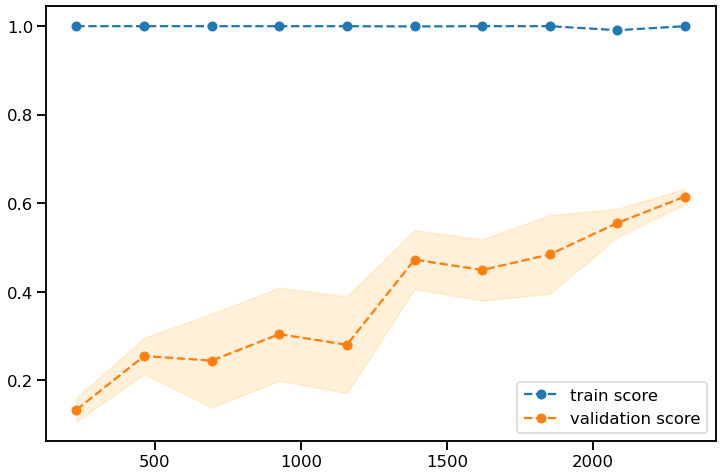

In [248]:
evaluation_dummies(model)

In [253]:
def evaluation(model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    N , train_score, val_score = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10), scoring="f1")

    train_scores_mean = np.mean(val_score, axis=1)
    train_scores_std = np.std(val_score, axis=1)

    plt.figure(figsize=(12,8))
    plt.fill_between(N, train_scores_mean + train_scores_std, train_scores_mean - train_scores_std, alpha=0.15, color='orange')
    plt.plot(N, train_score.mean(axis=1), label="train score", linestyle='--', marker='o')
    plt.plot(N, val_score.mean(axis=1), label="validation score", linestyle='--', marker='o')
    plt.legend()

[[737   4]
 [ 19 122]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       741
           1       0.97      0.87      0.91       141

    accuracy                           0.97       882
   macro avg       0.97      0.93      0.95       882
weighted avg       0.97      0.97      0.97       882



D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

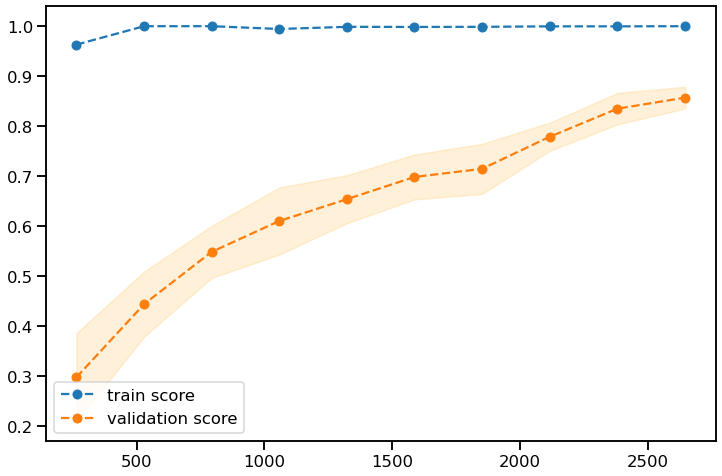

In [254]:
evaluation(model)

In [260]:
X_train

array([[ 0.11614257, -0.75804238, -0.41505954, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88346652,  2.44627611, -0.73874671, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88346652,  0.35114479, -0.45432021, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.76079909,  1.95330403, -0.85972932, ...,  0.        ,
         1.        ,  0.        ],
       [-0.8704168 , -1.00452841, -0.87935966, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19926992, -0.63479936, -0.67025391, ...,  0.        ,
         1.        ,  0.        ]])

In [261]:
trainset.head()

Age Attrition BusinessTravel              Department  DistanceFromHome  \
2588   38        No  Travel_Rarely  Research & Development                 3   
2354   45        No  Travel_Rarely                   Sales                29   
655    45       Yes  Travel_Rarely         Human Resources                12   
4339   55        No  Travel_Rarely  Research & Development                 6   
3557   44        No  Travel_Rarely  Research & Development                 3   

          Education    EducationField  Gender JobLevel                JobRole  \
2588         Master     Life Sciences  Female        1   Sales Representative   
2354        College  Technical Degree  Female        2     Research Scientist   
655        Bachelor   Human Resources    Male        2  Laboratory Technician   
4339  Below College     Life Sciences  Female        2  Laboratory Technician   
3557         Master           Medical    Male        2     Research Scientist   

      ... meanPresenceTime  JobInvolvement  PerformanceRating  \
2588  ...         7.615880            High        Outstanding   
2354  ...         8.907959            High          Excellent   
655   ...         9.878690            High          Excellent   
4339  ...         6.076174          Medium          Excellent   
3557  ...         7.606718             Low          Excellent   

      EnvironmentSatisfaction JobSatisfaction  WorkLifeBalance  \
2588                   Medium       Very High             Best   
2354                     High             Low           Better   
655                       Low          Medium           Better   
4339                     High          Medium           Better   
3557                Very High       Very High           Better   

      meanStartingTime  meanEndingTime  DayOfAbsence  DayOfPresence  
2588          9.986181       17.602222            21            241  
2354         10.007252       18.914923            22            240  
655           9.986797       19.865584            30            232  
4339          9.993445       16.070572            22            240  
3557          9.987347       17.594286            16            246  

[5 rows x 30 columns]

## Modelisation 2
On va evaluer plusieurs models pour en tirer le meilleur

In [292]:
preprocessor = make_pipeline(PolynomialFeatures(1, include_bias=False), SelectKBest(f_classif, k=10))

In [293]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=42))
SVM = make_pipeline(preprocessor, SVC(random_state=42))
KNN = make_pipeline(preprocessor, KNeighborsClassifier())

In [294]:
dict_of_models = {"RandomForest" : RandomForest ,"AdaBoost" : AdaBoost , "SVM" : SVM ,"KNN" : KNN }

RandomForest
[[737   4]
 [ 19 122]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       741
           1       0.97      0.87      0.91       141

    accuracy                           0.97       882
   macro avg       0.97      0.93      0.95       882
weighted avg       0.97      0.97      0.97       882



D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

AdaBoost
[[718  23]
 [ 95  46]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       741
           1       0.67      0.33      0.44       141

    accuracy                           0.87       882
   macro avg       0.77      0.65      0.68       882
weighted avg       0.85      0.87      0.85       882



D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

SVM
[[728  13]
 [108  33]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       741
           1       0.72      0.23      0.35       141

    accuracy                           0.86       882
   macro avg       0.79      0.61      0.64       882
weighted avg       0.85      0.86      0.83       882



D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

KNN
[[690  51]
 [ 89  52]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       741
           1       0.50      0.37      0.43       141

    accuracy                           0.84       882
   macro avg       0.70      0.65      0.67       882
weighted avg       0.82      0.84      0.83       882



D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

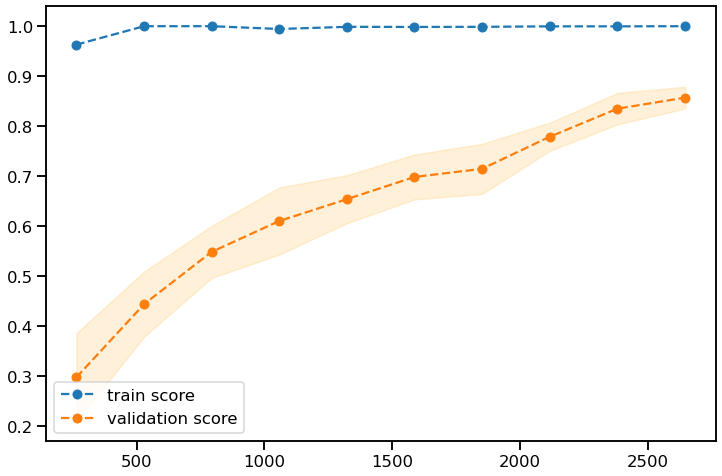

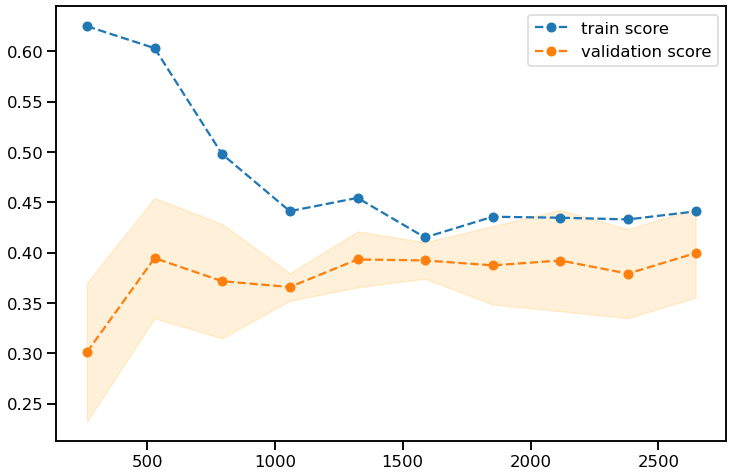

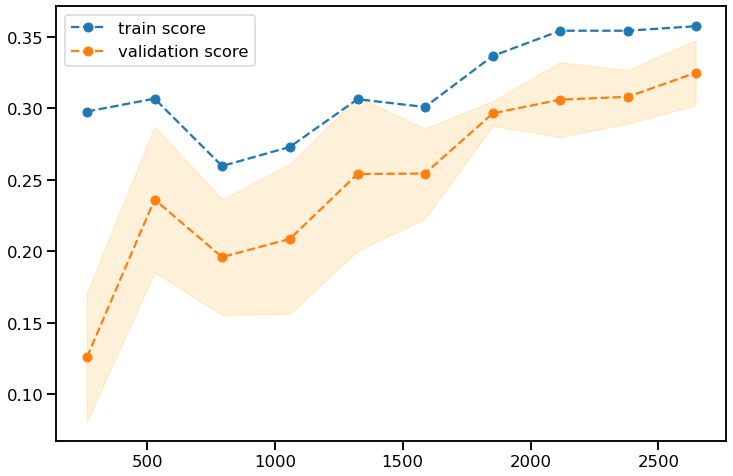

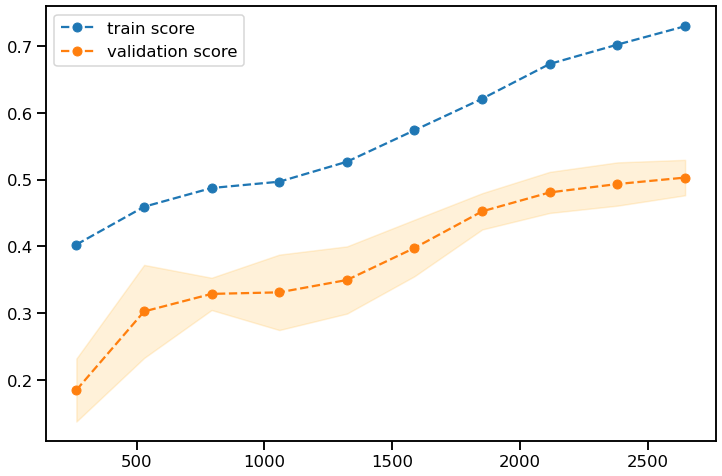

In [295]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

On remarque le model SVM à un train score et un validation score qui se rapproche et continu d'augmenter

## Optimisation
On va à présent optimiser notre model pour obtenir un meilleur recall

In [266]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [267]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('svc', SVC(random_state=42))])

In [304]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000],
                'pipeline__polynomialfeatures__degree':[2, 3],
                'pipeline__selectkbest__k': range(45, 60)}

In [305]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 1112  1113  1173 ... 79073 79075 79076] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 1112  1113  1155 ... 79073 79075 79076] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 1112  1113  1171 ... 79073 79075 79076] are constant.
  warnings.warn("Features %s are constant." % consta

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 58, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       741
           1       0.85      0.41      0.56       141

    accuracy                           0.89       882
   macro avg       0.88      0.70      0.75       882
weighted avg       0.89      0.89      0.88       882



D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [1112 1113 1173 1292 1293 1301 1332 1337 1348 1350 1356 1358 1412 1463
 1464 1465 1466 1518 1519 1520 1572 1573 1625 1664 1728 1729 1730 1731
 1732 1741 1760 1765 1776 1778 1779 1780 1781 1827 1828 1829 1873 1875
 1876 1922 2013 2100 2101 2102 2103 2142 2143 2144 2183 2184 2210 2223
 2282 2298 2300 2301 2302 2303 2304 2305 2306 2307 2337 2338 2339 2340
 2341 2342 2343 2360 2371 2373 2374 2375 2376 2377 2378 2408 2409 2410
 2411 2412 2442 2443 2444 2445 2475 2476 2477 2489 2507 2508 2538 2597
 2598 2625 2678 2679 2680 2703 2704 2727 2754 2772 2773 2774 2775 2793
 2794 2795 2813 2814 2832 2850 2854 2865 2867 2868 2869 2870 2883 2884
 2885 2898 2899 2912 2935 2937 2938 2939 2948 2949 2956 2958 2973 2975
 2988 2989 2990 2991 2993 2994 2995 2997 2998 3000] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_s

[[731  10]
 [ 83  58]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       741
           1       0.85      0.41      0.56       141

    accuracy                           0.89       882
   macro avg       0.88      0.70      0.75       882
weighted avg       0.89      0.89      0.88       882



D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  59  135  210  284  357  429  500  570  639  707  774  840  905  969
 1032 1094 1112 1113 1118 1127 1140 1155 1160 1171 1173 1182 1215 1220
 1231 1274 1292 1293 1297 1301 1303 1311 1313 1315 1317 1320 1330 1332
 1334 1337 1348 1350 1356 1358 1389 1412 1445 1450 1461 1463 1464 1465
 1466 1500 1518 1519 1520 1521 1525 1533 1535 1537 1551 1554 1559 1563
 1570 1572 1573 1574 1578 1592 1607 1612 1625 1626 1630 1637 1640 1641
 1644 1649 1653 1659 1660 1661 1664 1667 1668 1670 1671 1675 1677 1710
 1715 1726 1728 1729 1730 1731 1732 1733 1735 1737 1738 1739 1741 1743
 1744 1745 1746 1747 1748 1750 1753 1755 1758 1760 1761 1762 1764 1765
 1768 1769 1772 1776 1778 1779 1780 1781 1809 1827 1828 1829 1857 1862
 1873 1875 1876 1904 1909 1920 1922 1929 1931 1933 1934 1947 1950 1955
 1957 1959 1966 1995 1997 2002 2013 2020 2039 2082 2100 2101 2102 2103
 2124 2129 2140 2142 2143 2144 2165 2183

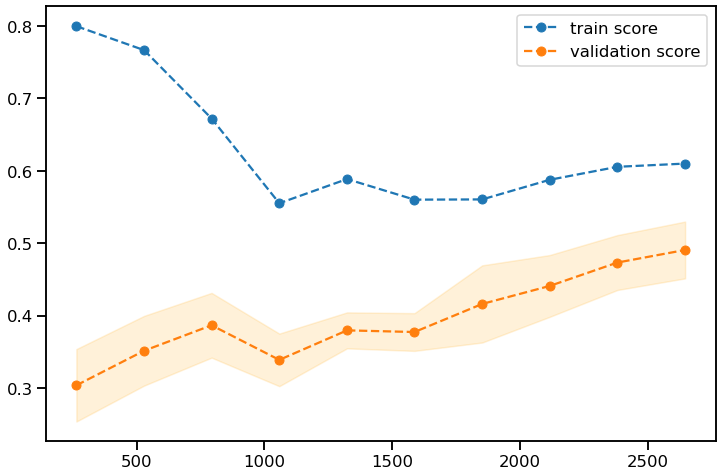

In [306]:
evaluation(grid.best_estimator_)

## Precision Recall Curve

In [315]:
from sklearn.metrics import precision_recall_curve, recall_score, precision_score

In [308]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

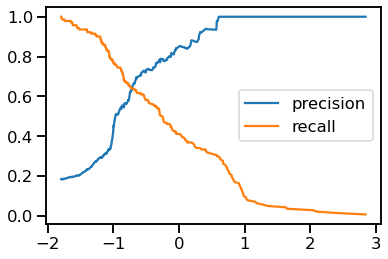

In [309]:
plt.plot(threshold, precision[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()

In [310]:
def model_final(model, X, treshold=0):
    return model.decision_function(X) > treshold

In [311]:
y_pred = model_final(grid.best_estimator_, X_test, treshold=-1)

In [312]:
f1_score(y_test, y_pred)

0.558974358974359

In [313]:
recall_score(y_test, y_pred)

0.7730496453900709

In [316]:
precision_score(y_test, y_pred)

0.43775100401606426

In [319]:
y_pred

array([False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True,